# Telecom Churn Case Study

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting the display option to display all the rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Importing the datset
data = pd.read_csv('telecom_churn_data.csv')
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
#Checking the shape of the dataset
data.shape

(99999, 226)

In [5]:
#Checking Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#Describing the dataset
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
#Checking the columns in the dataset
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

## Segregrating the High Value Customers

In [8]:
#Calculating the average recharge amount for the month of June and July (Good Phase)
data['avg_rech_amt_6+7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [9]:
#Taking the value of the 70th percentile
q = data['avg_rech_amt_6+7'].quantile(0.7)
q

368.5

In [10]:
#Dropping all the other data than that of high value customers
data.drop((data[data['avg_rech_amt_6+7']<q]).index, axis=0, inplace=True)

#Checking the shape of the dataframe after segregration
data.shape

(30011, 227)

## Data Cleaning

### Handling Null Values

In [11]:
null_df = pd.DataFrame(round((data.isnull().sum()/len(data))*100,2), columns=['nulls']).sort_values(by='nulls', ascending=False)
null_df

nulls
arpu_3g_6                 62.02
count_rech_3g_6           62.02
fb_user_6                 62.02
arpu_2g_6                 62.02
night_pck_user_6          62.02
date_of_last_rech_data_6  62.02
total_rech_data_6         62.02
max_rech_data_6           62.02
av_rech_amt_data_6        62.02
count_rech_2g_6           62.02
fb_user_9                 61.81
night_pck_user_9          61.81
date_of_last_rech_data_9  61.81
total_rech_data_9         61.81
max_rech_data_9           61.81
count_rech_2g_9           61.81
arpu_2g_9                 61.81
count_rech_3g_9           61.81
arpu_3g_9                 61.81
av_rech_amt_data_9        61.81
count_rech_3g_7           61.14
arpu_2g_7                 61.14
date_of_last_rech_data_7  61.14
total_rech_data_7         61.14
fb_user_7                 61.14
av_rech_amt_data_7        61.14
max_rech_data_7           61.14
arpu_3g_7                 61.14
night_pck_user_7          61.14
count_rech_2g_7           61.14
av_rech_amt_data_8        60.83
night_pck_user_8          60.83
date_of_last_rech_data_8  60.83
arpu_2g_8                 60.83
max_rech_data_8           60.83
count_rech_2g_8           60.83
arpu_3g_8                 60.83
total_rech_data_8         60.83
fb_user_8                 60.83
count_rech_3g_8           60.83
std_og_mou_9               5.68
std_og_t2c_mou_9           5.68
loc_ic_mou_9               5.68
std_ic_t2t_mou_9           5.68
ic_others_9                5.68
onnet_mou_9                5.68
std_og_t2f_mou_9           5.68
std_ic_t2f_mou_9           5.68
std_ic_mou_9               5.68
isd_og_mou_9               5.68
isd_ic_mou_9               5.68
spl_og_mou_9               5.68
loc_ic_t2f_mou_9           5.68
og_others_9                5.68
std_ic_t2o_mou_9           5.68
loc_ic_t2m_mou_9           5.68
loc_ic_t2t_mou_9           5.68
spl_ic_mou_9               5.68
std_ic_t2m_mou_9           5.68
loc_og_t2m_mou_9           5.68
loc_og_mou_9               5.68
loc_og_t2f_mou_9           5.68
roam_og_mou_9              5.68
loc_og_t2c_mou_9           5.68
roam_ic_mou_9              5.68
loc_og_t2t_mou_9           5.68
std_og_t2m_mou_9           5.68
std_og_t2t_mou_9           5.68
offnet_mou_9               5.68
onnet_mou_8                3.13
loc_ic_mou_8               3.13
std_ic_t2o_mou_8           3.13
roam_ic_mou_8              3.13
roam_og_mou_8              3.13
loc_ic_t2m_mou_8           3.13
std_ic_mou_8               3.13
std_ic_t2f_mou_8           3.13
std_ic_t2t_mou_8           3.13
loc_og_t2t_mou_8           3.13
loc_ic_t2t_mou_8           3.13
offnet_mou_8               3.13
spl_ic_mou_8               3.13
loc_ic_t2f_mou_8           3.13
std_og_t2f_mou_8           3.13
loc_og_t2m_mou_8           3.13
loc_og_mou_8               3.13
std_og_t2m_mou_8           3.13
std_og_t2c_mou_8           3.13
std_ic_t2m_mou_8           3.13
std_og_t2t_mou_8           3.13
std_og_mou_8               3.13
ic_others_8                3.13
loc_og_t2f_mou_8           3.13
isd_og_mou_8               3.13
isd_ic_mou_8               3.13
spl_og_mou_8               3.13
loc_og_t2c_mou_8           3.13
og_others_8                3.13
date_of_last_rech_9        2.89
date_of_last_rech_8        1.98
last_date_of_month_9       1.20
std_ic_mou_6               1.05
ic_others_6                1.05
isd_ic_mou_6               1.05
std_ic_t2f_mou_6           1.05
spl_ic_mou_6               1.05
std_ic_t2o_mou_6           1.05
loc_og_t2f_mou_6           1.05
loc_og_t2t_mou_6           1.05
std_og_t2c_mou_6           1.05
std_og_t2f_mou_6           1.05
std_og_t2m_mou_6           1.05
isd_og_mou_6               1.05
std_og_t2t_mou_6           1.05
spl_og_mou_6               1.05
loc_og_mou_6               1.05
og_others_6                1.05
loc_og_t2c_mou_6           1.05
loc_ic_t2t_mou_6           1.05
std_ic_t2m_mou_6           1.05
loc_og_t2m_mou_6           1.05
std_og_mou_6               1.05
onnet_mou_6                1.05
roam_og_mou_6              1.05
loc_ic_t2f_mou_6          

In [12]:
#Dropping all columns with null value percentage greater than 40
data.drop((null_df[null_df['nulls']>40]).index, axis=1, inplace=True)

#Checking the shape of the dataset after dropping the features
data.shape

(30011, 187)

In [13]:
#Dropping entries with null values as the loss of data is a mere 6%
data.drop((data[data.isnull().sum(axis=1)>0]).index, inplace=True)

#Checking the shape of the dataset after dropping the entries
data.shape

(27418, 187)

In [14]:
#Checking null values again
null_df = pd.DataFrame(round((data.isnull().sum()/len(data))*100,2), columns=['nulls']).sort_values(by='nulls', ascending=False)
null_df

nulls
mobile_number           0.0
spl_ic_mou_9            0.0
std_ic_mou_8            0.0
std_ic_mou_9            0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
total_ic_mou_9          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
spl_ic_mou_8            0.0
isd_ic_mou_6            0.0
total_rech_num_9        0.0
isd_ic_mou_7            0.0
isd_ic_mou_8            0.0
isd_ic_mou_9            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
ic_others_9             0.0
total_rech_num_6        0.0
total_rech_num_7        0.0
std_ic_mou_7            0.0
std_ic_mou_6            0.0
std_ic_t2o_mou_9        0.0
std_ic_t2o_mou_8        0.0
loc_ic_t2f_mou_9        0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
loc_ic_mou_9            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2t_mou_9        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2m_mou_9        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2f_mou_9        0.0
std_ic_t2o_mou_6        0.0
std_ic_t2o_mou_7        0.0
total_rech_num_8        0.0
total_rech_amt_6        0.0
loc_ic_t2f_mou_7        0.0
monthly_3g_8            0.0
monthly_2g_7            0.0
monthly_2g_8            0.0
monthly_2g_9            0.0
sachet_2g_6             0.0
sachet_2g_7             0.0
sachet_2g_8             0.0
sachet_2g_9             0.0
monthly_3g_6            0.0
monthly_3g_7            0.0
monthly_3g_9            0.0
total_rech_amt_7        0.0
sachet_3g_6             0.0
sachet_3g_7             0.0
sachet_3g_8             0.0
sachet_3g_9             0.0
aon                     0.0
aug_vbc_3g              0.0
jul_vbc_3g              0.0
jun_vbc_3g              0.0
sep_vbc_3g              0.0
monthly_2g_6            0.0
vol_3g_mb_9             0.0
vol_3g_mb_8             0.0
vol_3g_mb_7             0.0
total_rech_amt_8        0.0
total_rech_amt_9        0.0
max_rech_amt_6          0.0
max_rech_amt_7          0.0
max_rech_amt_8          0.0
max_rech_amt_9          0.0
date_of_last_rech_6     0.0
date_of_last_rech_7     0.0
date_of_last_rech_8     0.0
date_of_last_rech_9     0.0
last_day_rch_amt_6      0.0
last_day_rch_amt_7      0.0
last_day_rch_amt_8      0.0
last_day_rch_amt_9      0.0
vol_2g_mb_6             0.0
vol_2g_mb_7             0.0
vol_2g_mb_8             0.0
vol_2g_mb_9             0.0
vol_3g_mb_6             0.0
loc_ic_t2f_mou_8        0.0
loc_ic_t2f_mou_6        0.0
circle_id               0.0
loc_og_t2m_mou_7        0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_8        0.0
loc_og_mou_7            0.0
loc_og_t2m_mou_9        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2f_mou_9        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_t2c_mou_9        0.0
roam_ic_mou_9           0.0
roam_ic_mou_8           0.0
roam_ic_mou_7           0.0
roam_ic_mou_6           0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
loc_og_mou_6            0.0
loc_og_mou_8            0.0
loc_ic_t2m_mou_9        0.0
total_og_mou_6    

The dataset now seems to be void of null values.

In [15]:
#Checking for unique values
unique_df= pd.DataFrame(data.nunique(), columns=['No']).sort_values(by='No')
unique_df

No
std_ic_t2o_mou_9          1
std_og_t2c_mou_7          1
std_og_t2c_mou_8          1
std_og_t2c_mou_9          1
std_ic_t2o_mou_8          1
std_ic_t2o_mou_7          1
std_ic_t2o_mou_6          1
last_date_of_month_9      1
std_og_t2c_mou_6          1
std_og_t2o_mou            1
loc_og_t2o_mou            1
circle_id                 1
last_date_of_month_8      1
loc_ic_t2o_mou            1
last_date_of_month_6      1
last_date_of_month_7      1
monthly_2g_6              5
monthly_2g_9              5
monthly_2g_8              6
monthly_2g_7              6
monthly_3g_9             11
monthly_3g_6             12
monthly_3g_8             12
monthly_3g_7             15
sachet_3g_6              25
sachet_3g_7              26
sachet_3g_9              27
sachet_3g_8              29
sachet_2g_6              29
sachet_2g_9              29
date_of_last_rech_9      30
date_of_last_rech_6      30
date_of_last_rech_7      31
date_of_last_rech_8      31
sachet_2g_7              33
sachet_2g_8              34
spl_ic_mou_6             75
spl_ic_mou_8             84
spl_ic_mou_7             93
total_rech_num_8         94
total_rech_num_9         95
total_rech_num_7         95
total_rech_num_6         97
og_others_7             114
og_others_8             129
og_others_9             130
last_day_rch_amt_7      145
max_rech_amt_7          147
last_day_rch_amt_6      150
max_rech_amt_6          161
last_day_rch_amt_9      166
last_day_rch_amt_8      174
max_rech_amt_8          179
max_rech_amt_9          184
spl_ic_mou_9            286
og_others_6             831
isd_og_mou_8            869
isd_og_mou_9            869
isd_og_mou_6            975
isd_og_mou_7           1005
ic_others_6            1175
ic_others_8            1233
ic_others_9            1272
ic_others_7            1326
std_og_t2f_mou_9       1553
loc_og_t2c_mou_9       1566
std_og_t2f_mou_8       1576
loc_og_t2c_mou_6       1599
std_og_t2f_mou_7       1639
loc_og_t2c_mou_8       1693
loc_og_t2c_mou_7       1693
std_og_t2f_mou_6       1704
std_ic_t2f_mou_8       1893
std_ic_t2f_mou_9       1938
std_ic_t2f_mou_6       1960
std_ic_t2f_mou_7       2001
sep_vbc_3g             2133
total_rech_amt_6       2161
total_rech_amt_7       2210
total_rech_amt_9       2235
total_rech_amt_8       2269
spl_og_mou_6           2927
avg_rech_amt_6+7       2940
spl_og_mou_9           2943
loc_og_t2f_mou_8       3060
loc_og_t2f_mou_9       3066
loc_og_t2f_mou_6       3152
loc_og_t2f_mou_7       3172
isd_ic_mou_6           3180
spl_og_mou_8           3192
isd_ic_mou_9           3266
spl_og_mou_7           3278
aon                    3303
roam_ic_mou_9          3313
isd_ic_mou_8           3355
isd_ic_mou_7           3419
roam_ic_mou_7          3437
roam_ic_mou_8          3527
roam_og_mou_9          3926
roam_og_mou_7          4085
roam_ic_mou_6          4104
roam_og_mou_8          4189
std_ic_t2t_mou_9       4238
std_ic_t2t_mou_8       4397
std_ic_t2t_mou_6       4411
std_ic_t2t_mou_7       4538
loc_ic_t2f_mou_9       4567
loc_ic_t2f_mou_8       4626
loc_ic_t2f_mou_6       4668
loc_ic_t2f_mou_7       4779
roam_og_mou_6          4839
std_ic_t2m_mou_9       6118
std_ic_t2m_mou_8       6308
jun_vbc_3g             6335
std_ic_t2m_mou_6       6384
vol_3g_mb_6            6484
std_ic_t2m_mou_7       6539
jul_vbc_3g             6800
vol_3g_mb_9            6813
vol_3g_mb_8            6862
vol_2g_mb_9            6895
vol_3g_mb_7            6924
aug_vbc_3g             6940
vol_2g_mb_8            7120
vol_2g_mb_6            7357
vol_2g_mb_7            7422
std_ic_mou_9           7676
std_ic_mou_8           7886
std_ic_mou_6           8033
std_ic_mou_7           8247
loc_ic_t2t_mou_9       9344
loc_ic_t2t_mou_8       9528
loc_ic_t2t_mou_6       9590
loc_ic_t2t_mou_7       9712
loc_og_t2t_mou_9      10280
loc_og_t2t_mou_8      10620
loc_og_t2t_mou_6      10759
loc_og_t2t_mou_7      10859
std_og_t2t_mou_9      10981
std_og_t2t_mou_8      11413
std_og_t2t_mou_6      11974
std_og_t2t_mou_7      12232
std_og_t2m_mou_9     

Here we can see that there are many features with only one unique value. These features will be of no use to us in model building hence eliminating them from the dataset.

In [16]:
#Eliminating features with only one unique value
data.drop(unique_df[unique_df['No']==1].index, axis=1, inplace=True)

#Checking the shape of the Dataframe after dropping the values
data.shape

(27418, 171)

In [17]:
#Checking the Dataframe again
data.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
8      7001524846  378.721  492.223  137.362  166.787       413.69   
13     7002191713  492.846  205.671  593.260  322.732       501.76   
16     7000875565  430.975  299.869  187.894  206.490        50.51   
17     7000187447  690.008   18.980   25.499  257.583      1185.91   
21     7002124215  514.453  597.753  637.760  578.596       102.41   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   
21       132.11        85.14       161.63        757.93        896.68   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   
21        983.39        869.89           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   
21              4.48              6.16             23.34             29.98   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   
21             91.81             87.93            104.81            107.54   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   
21               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
8         378.09        288.18         63.04         60.71            116.56   
13        205.31         53.48        353.99        119.69            446.41   
16        315.91        215.64        205.93        233.04        

In [18]:
#Dropping Duplicates
data.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [19]:
#Dropping "mobile_number" as it is an identifier column
dup=data
data.drop('mobile_number', axis=1, inplace=True)

In [20]:
#Checking the Datatypes
data.dtypes

arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
arpu_9                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
onnet_mou_9            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
offnet_mou_9           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_ic_mou_9          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
roam_og_mou_9          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2t_mou_9       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2m_mou_9       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2f_mou_9       float64
loc_og_t

Here we see that the only columns with object datatype are actually datetime columns. Hence we have to change their datatype.

In [21]:
#Selecting the object datatype columns
chng_cols = data.select_dtypes(include = ['object'])
chng_cols.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

In [22]:
#Converting to DateTime datatype
for c in chng_cols.columns:
    data[c] = pd.to_datetime(data[c])

In [23]:
#Checking the Datatypes again
data.dtypes

arpu_6                        float64
arpu_7                        float64
arpu_8                        float64
arpu_9                        float64
onnet_mou_6                   float64
onnet_mou_7                   float64
onnet_mou_8                   float64
onnet_mou_9                   float64
offnet_mou_6                  float64
offnet_mou_7                  float64
offnet_mou_8                  float64
offnet_mou_9                  float64
roam_ic_mou_6                 float64
roam_ic_mou_7                 float64
roam_ic_mou_8                 float64
roam_ic_mou_9                 float64
roam_og_mou_6                 float64
roam_og_mou_7                 float64
roam_og_mou_8                 float64
roam_og_mou_9                 float64
loc_og_t2t_mou_6              float64
loc_og_t2t_mou_7              float64
loc_og_t2t_mou_8              float64
loc_og_t2t_mou_9              float64
loc_og_t2m_mou_6              float64
loc_og_t2m_mou_7              float64
loc_og_t2m_m

Here we see that the datatypes have been connected.

## Tagging Churners

In [24]:
#Tagging Churners as '1' and non churners as '0'
data['Churn'] = np.where((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0),1,0)

Here we have tagged the customers who have not made any incoming or outgoing calls nor have used mobile data even once in the month of september as Churned Customers(Churn=1) and the other customers have been tagged as non-churned(Churn=0).

In [25]:
#Checking the dataframe 
data.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721  492.223  137.362  166.787       413.69       351.03        35.08   
13  492.846  205.671  593.260  322.732       501.76       108.39       534.24   
16  430.975  299.869  187.894  206.490        50.51        74.01        70.61   
17  690.008   18.980   25.499  257.583      1185.91         9.28         7.79   
21  514.453  597.753  637.760  578.596       102.41       132.11        85.14   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   
21       161.63        757.93        896.68        983.39        869.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   
21              6.16             23.34             29.98             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   
21             87.93            104.81            107.54              0.75   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   
21              0.00              1.58              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0              0.00               0.0        315.91   
17               0.0              0.00               0.0         97.54   
21               0.0              0.00               0.0         97.04   

    loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
8         288.18         63.04         60.71            116.56   
13         53.48        353.99        119.69            446.41   
16        215.64        205.93        233.04              7.89   
17          0.00          0.00         45.79     

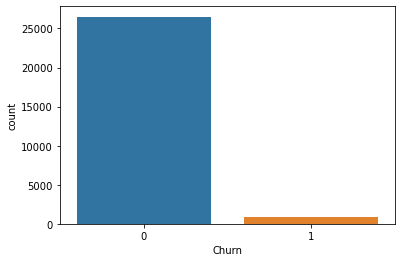

In [26]:
#Checking the class imbalance
sns.countplot(data['Churn'])
plt.show()

Here we see that there is a high class imbalance.

In [27]:
#Checking the class representations percentage-wise
cls_imb = data['Churn'].value_counts(normalize=True)
cls_imb

0    0.966774
1    0.033226
Name: Churn, dtype: float64

The churn percentage is **3.33%**.

In [28]:
#Calculating the class imbalance ratio
(cls_imb[0]/cls_imb[1])

29.096597145993414

Hence we have 29 non churning customers for every churning customer in the dataset. There is class imbalance present in the dataset.

##### Dropping attributes corresponding to the churn phase(month_9)

In [29]:
#Listing the features belonging to the month of september
col_9 = [col for col in data.columns.to_list() if '_9' in col]
col_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [30]:
#Dropping the Churn Phase Features
data.drop(col_9, axis=1, inplace=True)

#Checking the shape of the dataset
data.shape

(27418, 130)

## Outlier Analysis and Treatment

In [31]:
#Segmenting the continuous variables
num_df= data.select_dtypes(include=['int64','float64'])
data_n=num_df.columns
data_n

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'avg_rech_amt_6+7'],
      dtype='object', length=126)

In [32]:
#Checking the distribution of the columns statistically
data.describe(percentiles=[0.25,0.5,0.75,0.90,0.99,0.995,0.998,0.999,0.9995])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count   27418.000000  27418.000000  27418.000000  27418.000000  27418.000000   
mean      584.053253    596.390146    560.479179    295.561404    310.025112   
std       428.428039    454.471458    489.668951    454.771967    481.782449   
min      -810.661000   -622.509000   -345.129000      0.000000      0.000000   
25%       365.296250    372.221250    318.806750     43.940000     45.015000   
50%       492.912500    498.172000    470.484000    128.940000    131.105000   
75%       695.626500    704.034500    688.571500    354.475000    369.055000   
90%       980.459200    997.349400    998.542900    787.996000    831.435000   
99%      1937.949210   1987.311140   1990.072440   2130.928200   2229.305000   
99.5%    2371.046910   2360.570385   2409.089420   2704.610400   2791.979150   
99.8%    2931.950386   3139.037394   3122.873900   3414.189500   3647.686780   
99.9%    3552.049531   3984.391643   3954.491098   4160.030450   4487.583700   
99.95%   4840.990006   5187.456800   5786.741660   4837.912305   5447.726070   
max     27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

         onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count   27418.000000  27418.000000  27418.000000  27418.000000   27418.000000   
mean      283.256279    417.042079    431.043660    395.171105      17.422232   
std       474.533256    458.483312    481.514186    478.601051      77.317472   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%        35.410000    142.572500    145.907500    115.380000       0.000000   
50%       111.435000    285.760000    290.510000    259.860000       0.000000   
75%       322.720000    521.877500    541.217500    503.390000       0.000000   
90%       760.434000    901.417000    937.506000    878.590000      33.455000   
99%      2224.885000   2255.527500   2344.977500   2228.173000     348.089200   
99.5%    2777.695200   2683.430800   2828.736150   2840.563200     486.752200   
99.8%    3593.258500   3516.239280   3713.675840   3667.186200     719.933080   
99.9%    4255.447540   4126.014310   4545.708550   4449.480590     908.525070   
99.95%   5211.170755   4850.341200   5051.017055   5109.845030    1228.357895   
max     10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

        roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count    27418.000000   27418.000000   27418.000000   27418.000000   
mean        13.622114      13.888927      29.148205      22.051034   
std         76.915020      76.982362     116.862059      97.990013   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
90%         18.846000      20.619000      65.769000      41.402000   
99%        292.456000     292.518100     534.029800     448.296000   
99.5%      438.190450     422.872300     761.366800     677.769200   
99.8%      693.119720     704.244920    1131.709240     993.654000   
99.9%     1043.472940     969.059450    1439.972400    1244.197980   
99.95%    1312.636365    1205.855610    1761.041215    1494.571910   
max       3813.290000    4169.810000    3775.110000    2812.040000   

        roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    27418.000000      27418.000000      27418.000000      27418.000000   
mean        22.386487         96.879108         99.683622         92.932317   
std        109.020893        238.760980        254.933335        243.271823   
min          0.000000          0.000000          0.000000          0.000000   
25%          0.000000          9.330000         10.410000          8.180000   
50%          0.000000         34.220000         35.820000         32.735

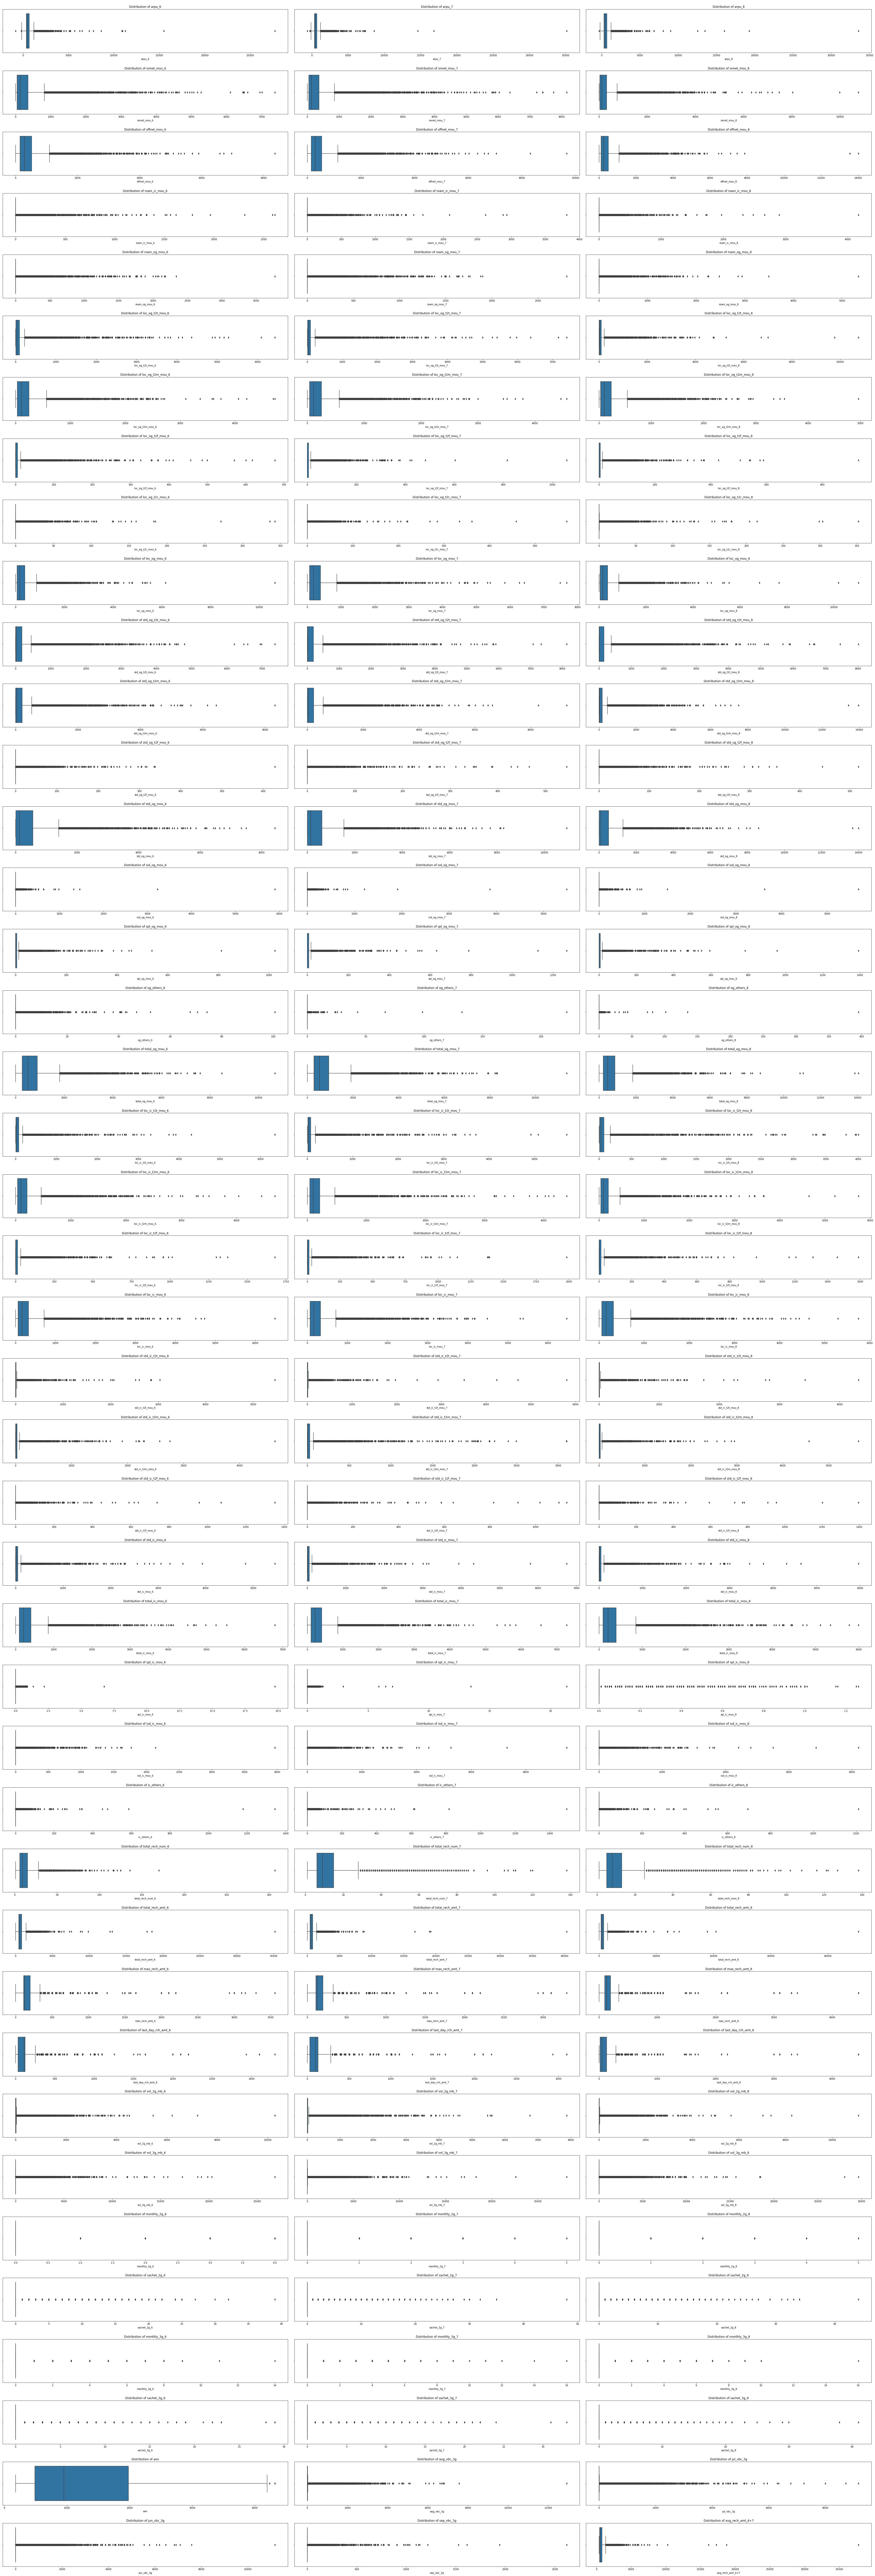

In [33]:
#Plotting boxplots to check the distribution of the variables
c=1
plt.figure(figsize=[50,150])
for i in data_n:
    plt.subplot(43,3,c)
    plt.title(f'\nDistribution of {i}')
    plt.xlabel(f'{i}')
    sns.boxplot(data[i])
    c+=1
plt.tight_layout()
plt.show()

Here we see the presence of outliers above 90% of the data to speak in a general sense. Hence we can trim outliers with that notion.

In [34]:
#Trimming Outliers
for col in data_n:
        q3 = data[col].quantile(0.90)
        q1 = data[col].quantile(0.1)
        iqr = q3-q1
        range_low  = q1-1.5*iqr
        range_high = q3
        df = data.loc[(data[col] > range_low) & (data[col] < range_high)]

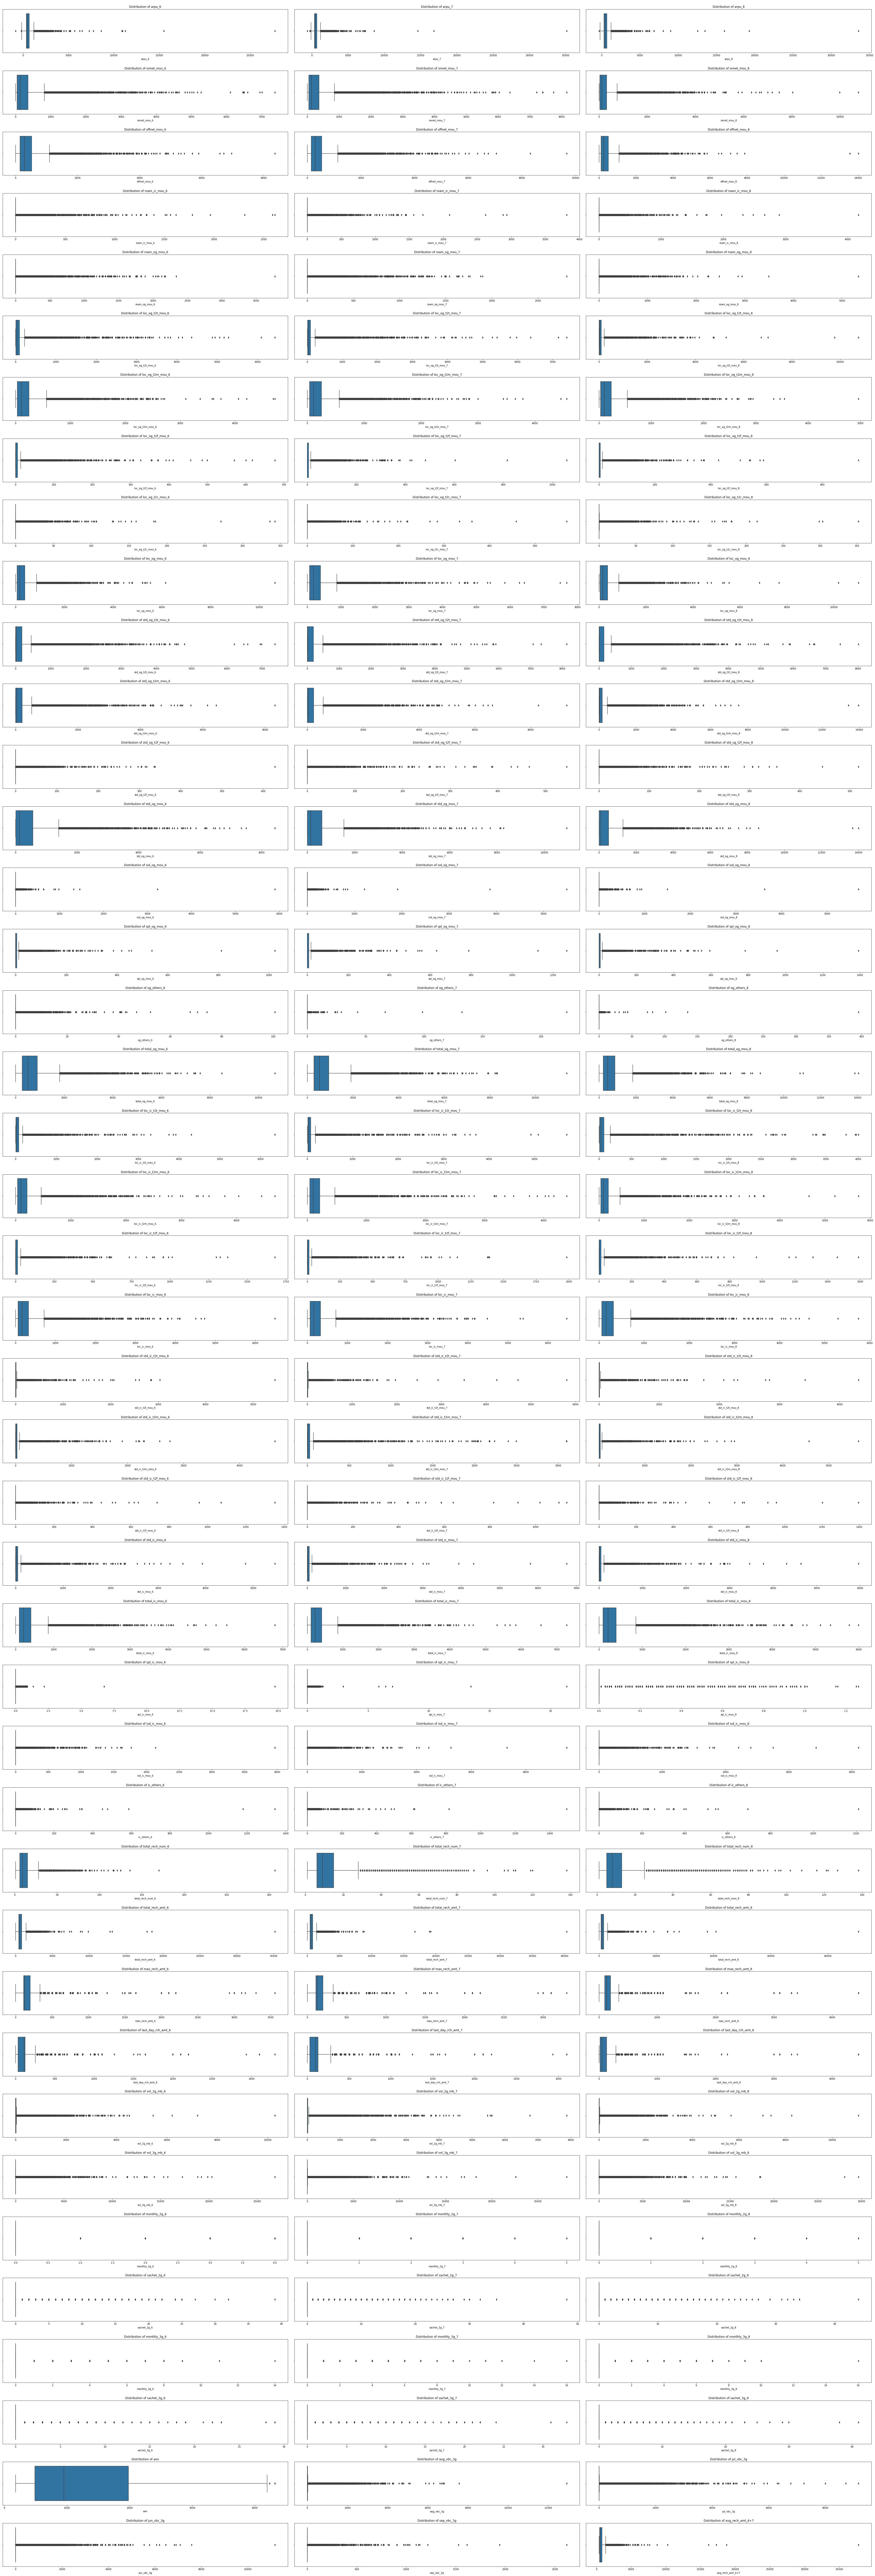

In [35]:
#Plotting the boxplot again to check the effectiveness of the trimming
c=1
plt.figure(figsize=[50,150])
for i in data_n:
    plt.subplot(43,3,c)
    plt.title(f'\nDistribution of {i}')
    plt.xlabel(f'{i}')
    sns.boxplot(data[i])
    c+=1
plt.tight_layout()
plt.show()

In [36]:
#Checking the shape of the dataset
df.shape

(24674, 130)

In [37]:
#Checking the outlier treatment statistically
df.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  24674.000000  24674.000000  24674.000000  24674.000000  24674.000000   
mean     500.853407    510.271514    486.527130    258.510468    271.148527   
std      215.782384    216.062632    282.634176    362.562668    387.274231   
min     -185.043000   -622.509000   -345.129000      0.000000      0.000000   
25%      353.402250    360.394250    304.772000     41.165000     42.180000   
50%      465.289500    470.742500    444.469000    119.350000    120.860000   
75%      619.792000    627.828000    619.906000    322.025000    333.920000   
max     2190.835000   2100.000000   5748.252000   5278.290000   6372.530000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  24674.000000  24674.000000  24674.000000  24674.000000   24674.000000   
mean     251.740696    357.108279    369.308631    345.232626      14.988562   
std      391.924101    331.572501    347.241561    379.623090      68.611469   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       32.910000    133.732500    136.465000    108.150000       0.000000   
50%      103.560000    266.300000    269.905000    242.820000       0.000000   
75%      294.910000    471.030000    484.902500    455.815000       0.000000   
max     6723.790000   3413.930000   3739.730000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   24674.000000   24674.000000   24674.000000   24674.000000   
mean       11.846258      11.704627      22.890722      16.980676   
std        71.282001      68.369333      82.726319      70.572102   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    2000.390000    1493.540000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   24674.000000      24674.000000      24674.000000      24674.000000   
mean       16.935476         87.749519         89.149005         83.948248   
std        74.853021        208.879852        217.258590        203.763362   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          8.780000          9.760000          7.680000   
50%         0.000000         32.120000         33.200000         30.420000   
75%         0.000000         87.480000         87.960000         84.452500   
max      1719.990000       5278.290000       6371.980000       6723.790000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      24674.000000      24674.000000      24674.000000      24674.000000   
mean         163.702490        166.312103        159.365237          6.254469   
std          196.354978        192.335182        196.747078         17.453772   
min            0.000000          0.000000          0.000000          0.000000   
25%           31.165000         35.510000         28.260000          0.000000   
50%           99.580000        103.935000         94.820000          0.350000   
75%          227.680000        228.877500        220.487500          4.880000   
max         2553.890000       2757.410000       3463.080000        499.640000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      24674.000000      24674.000000      24674.000000      24674.000000   
mean           6.455027          6.073594          1.543830          1.822570   
std           17.690913         17.158775          6.992317          9.043268   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.430000          0.3000

The outliers have been treated to a very good extent, so moving on to the next step Feature Engineering.

## Feature Engineering

In [38]:
#Changing the date columns to the respective days as the month and year is already evident
df['day_last_rech_6'] = df['date_of_last_rech_6'].dt.day
df['day_last_rech_7'] = df['date_of_last_rech_7'].dt.day
df['day_last_rech_8'] = df['date_of_last_rech_8'].dt.day

#Dropping the date columns as they are of no use now
df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

#Checking the dataframe for effective changes
df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721  492.223  137.362       413.69       351.03        35.08   
13  492.846  205.671  593.260       501.76       108.39       534.24   
16  430.975  299.869  187.894        50.51        74.01        70.61   
17  690.008   18.980   25.499      1185.91         9.28         7.79   
21  514.453  597.753  637.760       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               0.0               0.0               0.0   
21            876.99               0.0     

In [39]:
#The 'aon'(Age of Network) column can be listed in terms of months rather than days
df['aon_mns'] = df['aon']/30

#Dropping the 'aon' column as it is no longer required
df.drop('aon', axis=1, inplace=True)

#Checking the new column
df['aon_mns'].head()

8     10.500000
13    86.900000
16    17.033333
17    22.233333
21    24.000000
Name: aon_mns, dtype: float64

In [40]:
#Checking the columns in the dataset
cols=pd.DataFrame(df.columns)
cols

0
0                arpu_6
1                arpu_7
2                arpu_8
3           onnet_mou_6
4           onnet_mou_7
5           onnet_mou_8
6          offnet_mou_6
7          offnet_mou_7
8          offnet_mou_8
9         roam_ic_mou_6
10        roam_ic_mou_7
11        roam_ic_mou_8
12        roam_og_mou_6
13        roam_og_mou_7
14        roam_og_mou_8
15     loc_og_t2t_mou_6
16     loc_og_t2t_mou_7
17     loc_og_t2t_mou_8
18     loc_og_t2m_mou_6
19     loc_og_t2m_mou_7
20     loc_og_t2m_mou_8
21     loc_og_t2f_mou_6
22     loc_og_t2f_mou_7
23     loc_og_t2f_mou_8
24     loc_og_t2c_mou_6
25     loc_og_t2c_mou_7
26     loc_og_t2c_mou_8
27         loc_og_mou_6
28         loc_og_mou_7
29         loc_og_mou_8
30     std_og_t2t_mou_6
31     std_og_t2t_mou_7
32     std_og_t2t_mou_8
33     std_og_t2m_mou_6
34     std_og_t2m_mou_7
35     std_og_t2m_mou_8
36     std_og_t2f_mou_6
37     std_og_t2f_mou_7
38     std_og_t2f_mou_8
39         std_og_mou_6
40         std_og_mou_7
41         std_og_mou_8
42         isd_og_mou_6
43         isd_og_mou_7
44         isd_og_mou_8
45         spl_og_mou_6
46         spl_og_mou_7
47         spl_og_mou_8
48          og_others_6
49          og_others_7
50          og_others_8
51       total_og_mou_6
52       total_og_mou_7
53       total_og_mou_8
54     loc_ic_t2t_mou_6
55     loc_ic_t2t_mou_7
56     loc_ic_t2t_mou_8
57     loc_ic_t2m_mou_6
58     loc_ic_t2m_mou_7
59     loc_ic_t2m_mou_8
60     loc_ic_t2f_mou_6
61     loc_ic_t2f_mou_7
62     loc_ic_t2f_mou_8
63         loc_ic_mou_6
64         loc_ic_mou_7
65         loc_ic_mou_8
66     std_ic_t2t_mou_6
67     std_ic_t2t_mou_7
68     std_ic_t2t_mou_8
69     std_ic_t2m_mou_6
70     std_ic_t2m_mou_7
71     std_ic_t2m_mou_8
72     std_ic_t2f_mou_6
73     std_ic_t2f_mou_7
74     std_ic_t2f_mou_8
75         std_ic_mou_6
76         std_ic_mou_7
77         std_ic_mou_8
78       total_ic_mou_6
79       total_ic_mou_7
80       total_ic_mou_8
81         spl_ic_mou_6
82         spl_ic_mou_7
83         spl_ic_mou_8
84         isd_ic_mou_6
85         isd_ic_mou_7
86         isd_ic_mou_8
87          ic_others_6
88          ic_others_7
89          ic_others_8
90     total_rech_num_6
91     total_rech_num_7
92     total_rech_num_8
93     total_rech_amt_6
94     total_rech_amt_7
95     total_rech_amt_8
96       max_rech_amt_6
97       max_rech_amt_7
98       max_rech_amt_8
99   last_day_rch_amt_6
100  last_day_rch_amt_7
101  last_day_rch_amt_8
102         vol_2g_mb_6
103         vol_2g_mb_7
104         vol_2g_mb_8
105         vol_3g_mb_6
106         vol_3g_mb_7
107         vol_3g_mb_8
108        monthly_2g_6
109        monthly_2g_7
110        monthly_2g_8
111         sachet_2g_6
112         sachet_2g_7
113         sachet_2g_8
114        monthly_3g_6
115        monthly_3g_7
116        monthly_3g_8
117         sachet_3g_6
118         sachet_3g_7
119         sachet_3g_8
120          aug_vbc_3g
121          jul_vbc_3g
122          jun_vbc_3g
123          sep_vbc_3g
124    avg_rech_amt_6+7
125               Churn
126     day_last_rech_6
127     day_last_rech_7
128     day_last_rech_8
129             aon_mns

In [41]:
#Calculating the total minutes of usage for each month incoming calls and outgoing calls combined
df['total_mou_6'] = df['total_ic_mou_6'] + df['total_og_mou_6']
df['total_mou_7'] = df['total_ic_mou_7'] + df['total_og_mou_7']
df['total_mou_8'] = df['total_ic_mou_8'] + df['total_og_mou_8']

#Calculating the total minutes of usage during the good phase and the action phase
df['mou_gp'] = (df['total_mou_6'] + df['total_mou_7'])/2
df.rename(columns={'total_mou_8':'mou_ap'}, inplace=True)
#Calculating the difference
df['mou_diff'] = df['mou_ap']-df['mou_gp']

#Creating a classifier showing if there is a decrease in minutes of usage in the action phase compared to the good phase
df['dec_mou_ga'] = np.where((df['mou_diff']<0), 1, 0)

In [42]:
#Checking the dataframe head
df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721  492.223  137.362       413.69       351.03        35.08   
13  492.846  205.671  593.260       501.76       108.39       534.24   
16  430.975  299.869  187.894        50.51        74.01        70.61   
17  690.008   18.980   25.499      1185.91         9.28         7.79   
21  514.453  597.753  637.760       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               0.0               0.0               0.0   
21            876.99               0.0     

In [43]:
#Dropping the unneccessary features
df.drop(['total_mou_6', 'total_mou_7'], axis=1, inplace=True)

In [44]:
#Calculating the average revenue per user during the good phase and the action phase
df['arpu_gp'] = (df['arpu_6'] + df['arpu_7'])/2
df.rename(columns={'arpu_8':'arpu_ap'}, inplace=True)
#Calculating the difference
df['arpu_diff'] = df['arpu_ap']-df['arpu_gp']

#Creating a classifier showing if there is a decrease in average revenue per user in the action phase compared to the good phase
df['dec_arpu_ga'] = np.where((df['arpu_diff']<0), 1, 0)

In [45]:
#Calculating the number of recharges during the good phase and the action phase
df['total_rech_num_gp'] = (df['total_rech_num_6'] + df['total_rech_num_7'])/2
df.rename(columns={'total_rech_num_8':'total_rech_num_ap'}, inplace=True)
#Calculating the difference
df['total_rech_num_diff'] = df['total_rech_num_ap']-df['total_rech_num_gp']

#Creating a classifier showing if there is a decrease in number of recharges in the action phase compared to the good phase
df['dec_total_rech_num_ga'] = np.where((df['total_rech_num_diff']<0), 1, 0)

In [46]:
#Calculating the recharge amounts during the good phase and the action phase
df['total_rech_amt_gp'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
df.rename(columns={'total_rech_amt_8':'total_rech_amt_ap'}, inplace=True)
#Calculating the difference
df['total_rech_amt_diff'] = df['total_rech_amt_ap']-df['total_rech_amt_gp']

#Creating a classifier showing if there is a decrease in recharge amounts in the action phase compared to the good phase
df['dec_total_rech_amt_ga'] = np.where((df['total_rech_amt_diff']<0), 1, 0)

In [47]:
#Checking the dataset
df.head()

arpu_6   arpu_7  arpu_ap  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721  492.223  137.362       413.69       351.03        35.08   
13  492.846  205.671  593.260       501.76       108.39       534.24   
16  430.975  299.869  187.894        50.51        74.01        70.61   
17  690.008   18.980   25.499      1185.91         9.28         7.79   
21  514.453  597.753  637.760       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               0.0               0.0               0.0   
21            876.99               0.0     

## Exploratory Data Analysis

In [48]:
#Checking the correlation between different variables
corr = df.corr()
corr.loc[:,:] = np.tril(corr, k=-1)
corr = corr.stack()
corr[(corr > 0.60) | (corr < -0.60)].sort_values(ascending=False)

total_rech_amt_gp      avg_rech_amt_6+7       1.000000
                       arpu_gp                0.938398
arpu_gp                avg_rech_amt_6+7       0.938398
total_rech_amt_ap      arpu_ap                0.929812
total_rech_num_gp      total_rech_num_7       0.921010
                       total_rech_num_6       0.912184
total_ic_mou_6         loc_ic_mou_6           0.901218
total_ic_mou_8         loc_ic_mou_8           0.895266
total_ic_mou_7         loc_ic_mou_7           0.892486
total_rech_amt_6       arpu_6                 0.880146
std_ic_mou_8           std_ic_t2m_mou_8       0.879000
total_rech_amt_7       arpu_7                 0.878628
total_rech_amt_diff    arpu_diff              0.862711
mou_ap                 total_og_mou_8         0.862456
std_og_t2t_mou_8       onnet_mou_8            0.851728
std_ic_mou_7           std_ic_t2m_mou_7       0.846621
total_rech_amt_diff    total_rech_amt_ap      0.844181
std_og_t2m_mou_8       offnet_mou_8           0.842702
loc_ic_mou

In [49]:
#Checking the shape 
df.shape

(24674, 143)

In [50]:
#Dropping variables exibiting high correlations
df.drop(['avg_rech_amt_6+7','total_rech_num_7','total_rech_num_6','loc_ic_mou_6','loc_ic_mou_8','loc_ic_mou_7','arpu_6','std_ic_t2m_mou_8',
'arpu_7','total_og_mou_8','onnet_mou_8','std_ic_t2m_mou_7','offnet_mou_8','loc_ic_mou_7','std_ic_t2m_mou_6','loc_og_t2t_mou_7',
'loc_ic_t2m_mou_8','loc_ic_t2m_mou_6','std_og_mou_8','onnet_mou_7','offnet_mou_7','loc_og_mou_7','loc_ic_mou_6','total_ic_mou_7',
'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','onnet_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_7','total_ic_mou_6','std_og_t2t_mou_7'], axis=1,inplace=True)

In [51]:
#Checking the shape again
df.shape

(24674, 115)

In [52]:
#Checking the correlation between different variables
corr = df.corr()
corr.loc[:,:] = np.tril(corr, k=-1)
corr = corr.stack()
corr[(corr > 0.60) | (corr < -0.60)].sort_values(ascending=False)

total_rech_amt_gp      arpu_gp                0.938398
total_rech_amt_ap      arpu_ap                0.929812
total_rech_amt_diff    arpu_diff              0.862711
                       total_rech_amt_ap      0.844181
arpu_diff              arpu_ap                0.809499
loc_og_t2m_mou_8       loc_og_t2m_mou_7       0.798835
total_og_mou_7         std_og_mou_7           0.798062
std_og_t2m_mou_6       offnet_mou_6           0.796849
loc_ic_t2f_mou_8       loc_ic_t2f_mou_7       0.787204
loc_og_mou_6           loc_og_t2t_mou_6       0.776580
loc_og_t2f_mou_8       loc_og_t2f_mou_7       0.773971
loc_og_mou_8           loc_og_t2t_mou_8       0.773735
isd_ic_mou_7           isd_ic_mou_6           0.772721
total_og_mou_6         std_og_mou_6           0.771969
loc_og_t2f_mou_7       loc_og_t2f_mou_6       0.769268
loc_og_mou_8           loc_og_t2m_mou_8       0.763121
loc_og_t2m_mou_7       loc_og_t2m_mou_6       0.756719
loc_og_mou_6           loc_og_t2m_mou_6       0.751554
std_og_t2f

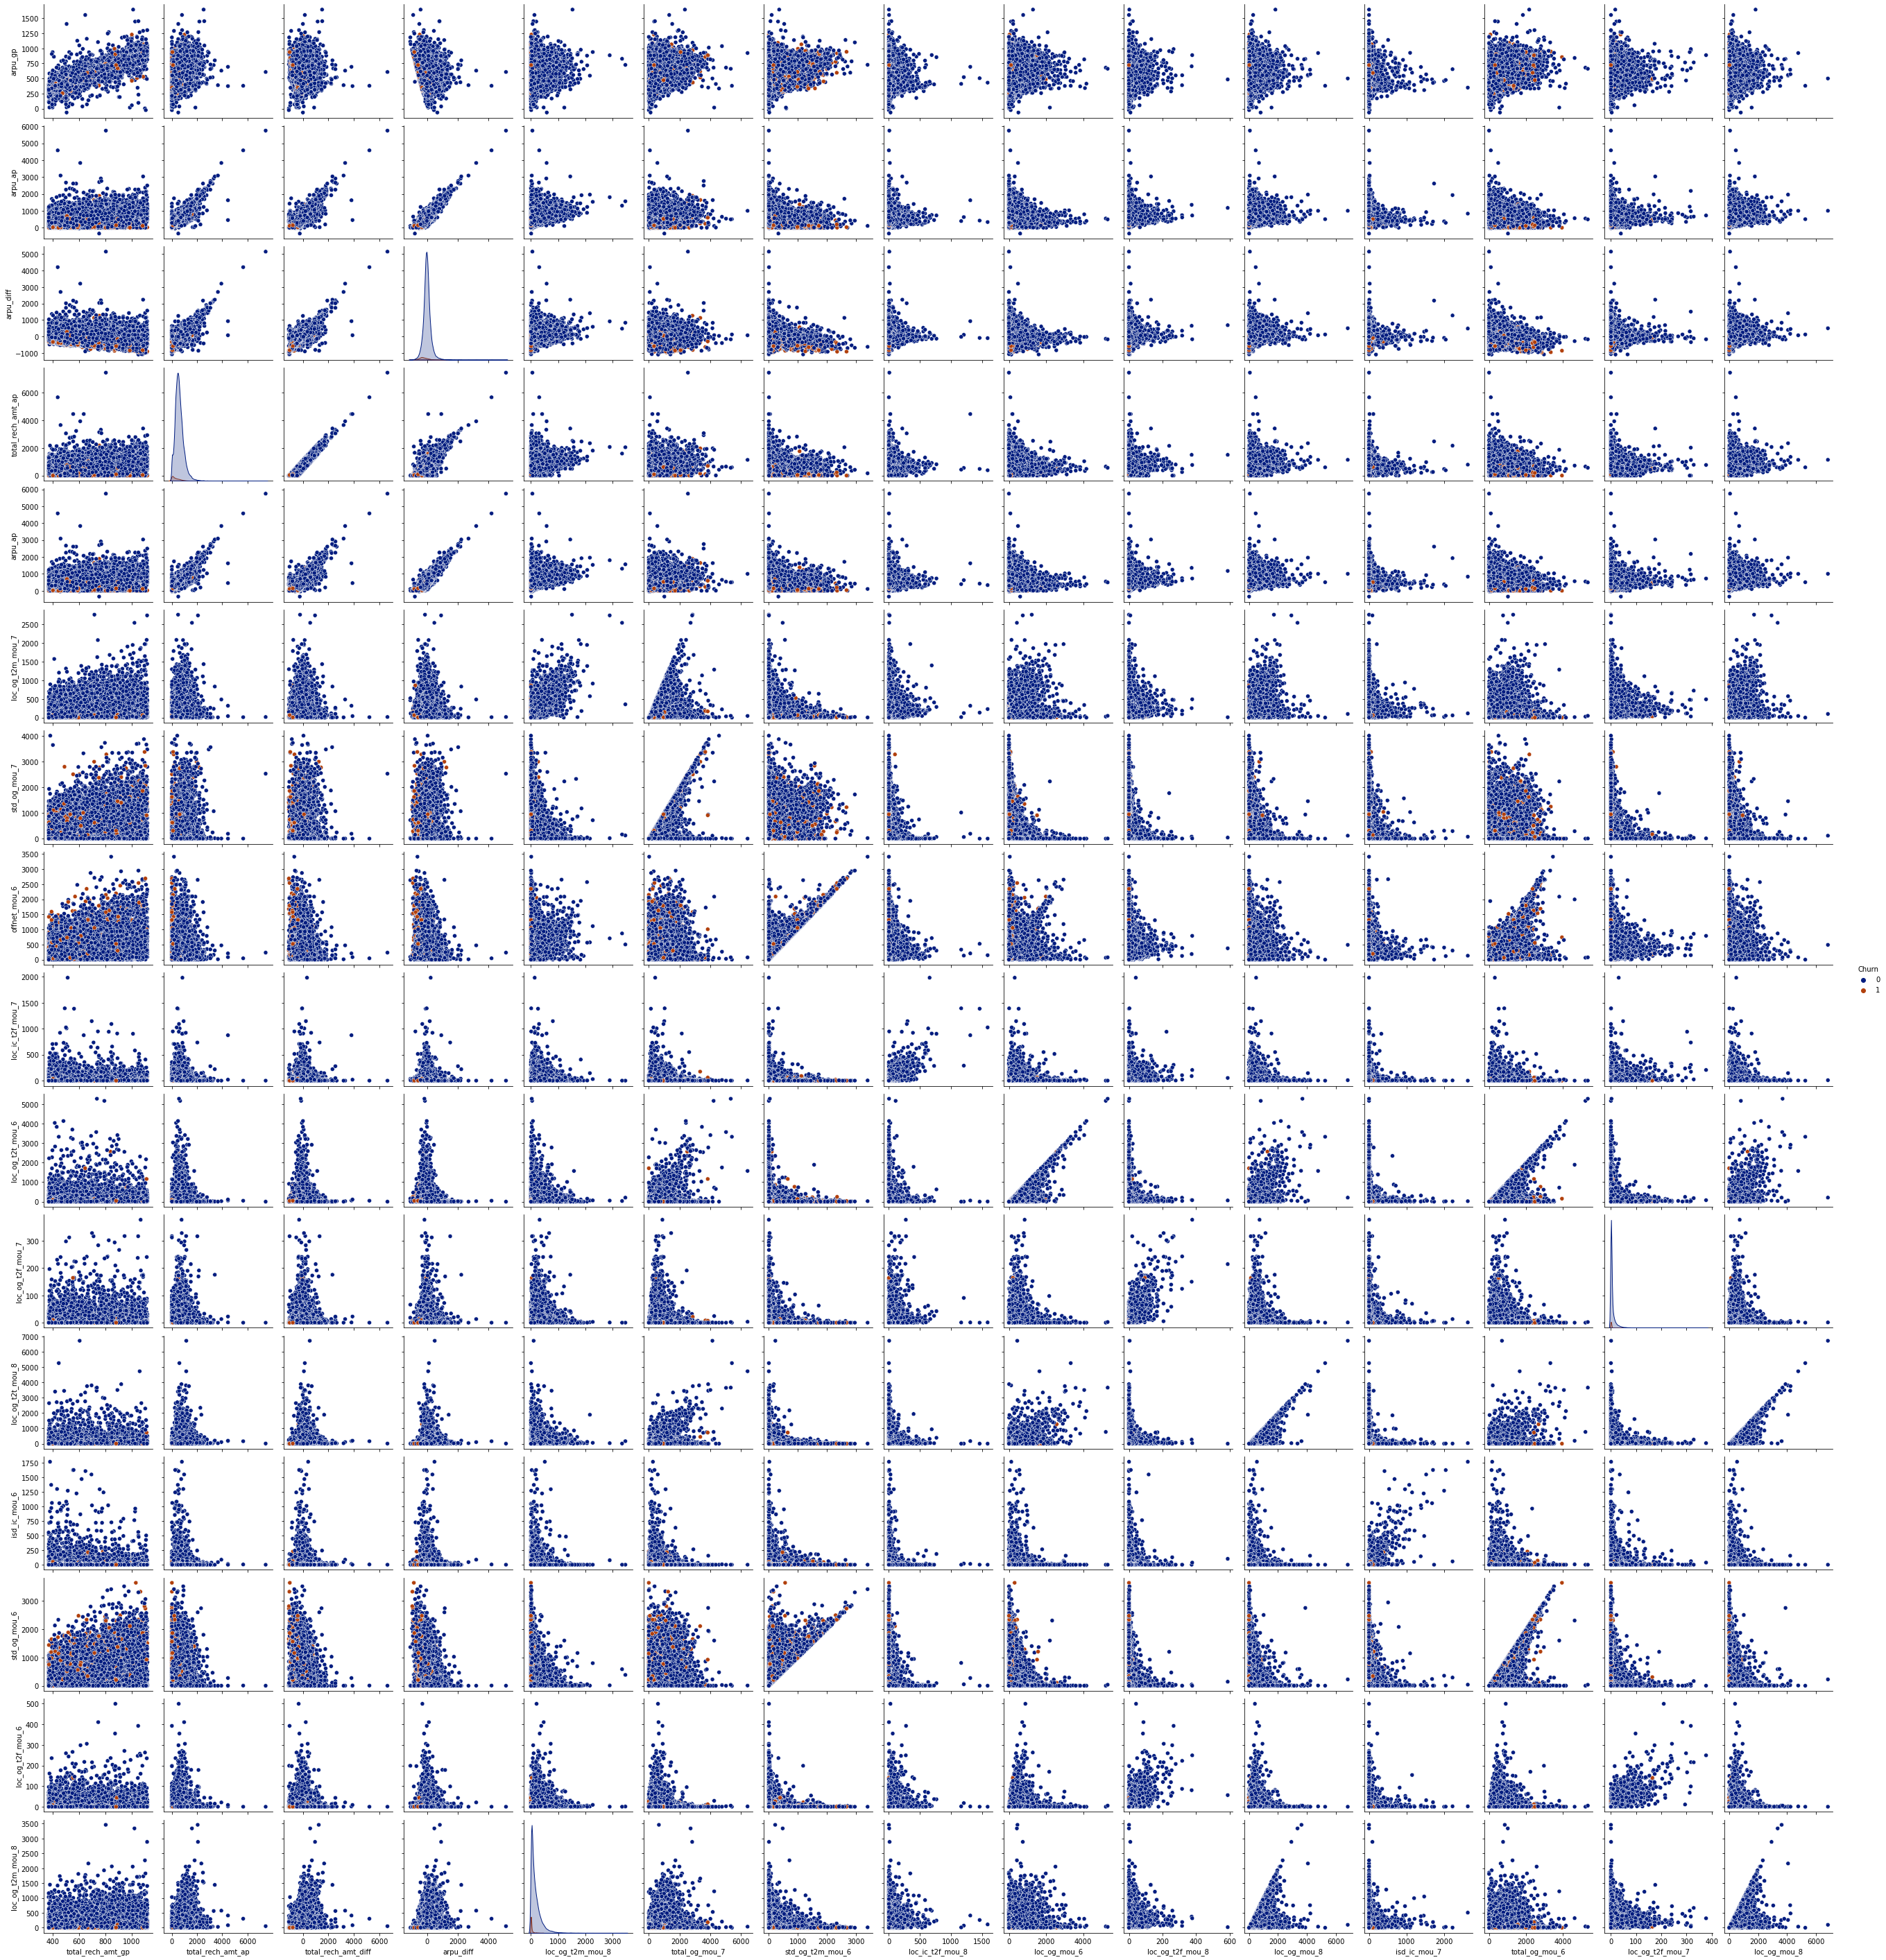

In [53]:
#Checking the correlation between the feature variables using pairplot
sns.pairplot(df,x_vars=['total_rech_amt_gp','total_rech_amt_ap','total_rech_amt_diff','arpu_diff','loc_og_t2m_mou_8','total_og_mou_7',
                       'std_og_t2m_mou_6','loc_ic_t2f_mou_8','loc_og_mou_6','loc_og_t2f_mou_8','loc_og_mou_8','isd_ic_mou_7','total_og_mou_6',
                       'loc_og_t2f_mou_7','loc_og_mou_8'], 
             y_vars=['arpu_gp','arpu_ap','arpu_diff','total_rech_amt_ap','arpu_ap','loc_og_t2m_mou_7','std_og_mou_7','offnet_mou_6',
                    'loc_ic_t2f_mou_7','loc_og_t2t_mou_6','loc_og_t2f_mou_7','loc_og_t2t_mou_8','isd_ic_mou_6','std_og_mou_6',
                    'loc_og_t2f_mou_6','loc_og_t2m_mou_8'],palette='dark', hue='Churn')
plt.show()

**OBSERVATIONS**<br><br>
1.There is visible correlation between 'arpu_ap' and 'arpu_diff'.<br><br>
2.There is visible correlation between 'total_recharge_amt_ap' and 'total_rech_amt_diff'.<br><br>
3.There is visible correlation between 'std_og_t2m_mou_6' and 'offnet_mou_6'.<br><br>
4.There is visible correlation between 'total_og_mou_6' and 'std_og_mou_6'.<br><br>
5.There is visible correlation between 'arpu_diff' and 'total_rech_amt_diff'.<br><br>
Here we do notice that there are a few variables with high correlation. But we keep them due to their business importance and let PCA handle the multicollinearity in the model.

### Univariate Analysis

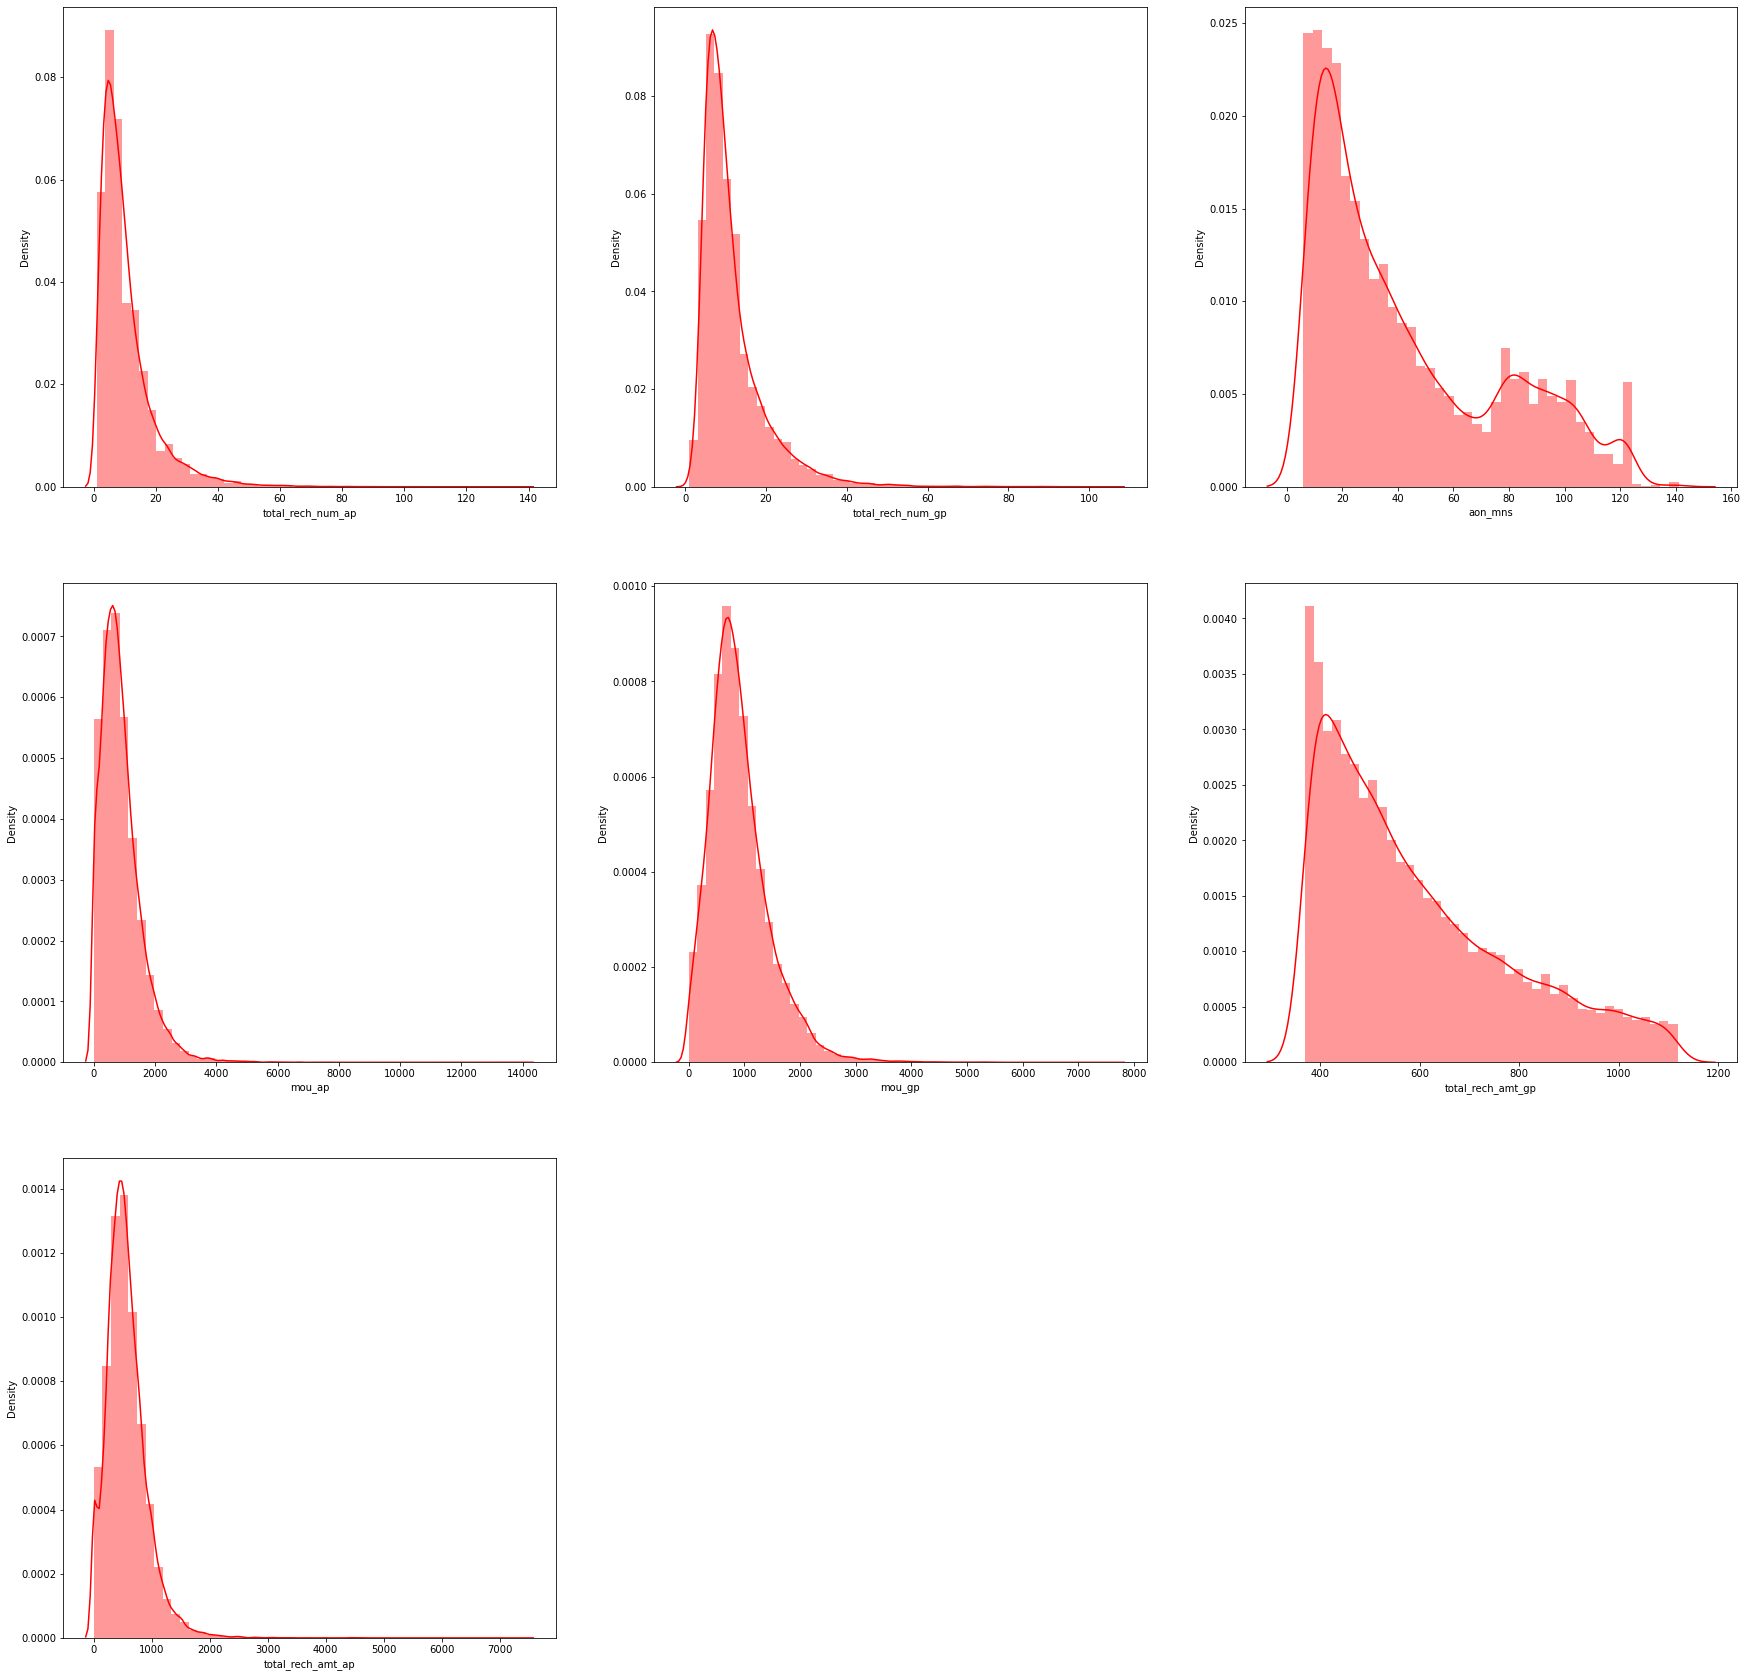

In [54]:
#Checking the distribution of a few interesting columns
ucols=['total_rech_num_ap','total_rech_num_gp','aon_mns','mou_ap','mou_gp','total_rech_amt_gp','total_rech_amt_ap']
plt.figure(figsize=[30,30])
i=1
for c in ucols:
    plt.subplot(3,3,i)
    sns.distplot(df[c], color='red')
    i+=1
plt.show()

All the distribution plots look to be right skewed.<br><br>
> The number of recharges seems to be highest in the 5-15 range.<br><br> 
> Most customers have been using the network for 10-30 months.<br><br>
> Most customer have use the network in the range of 500-1500 minutes.<br><br>
> Customers have seem to have recharged for higher amounts in the action phase compared to the good phase.

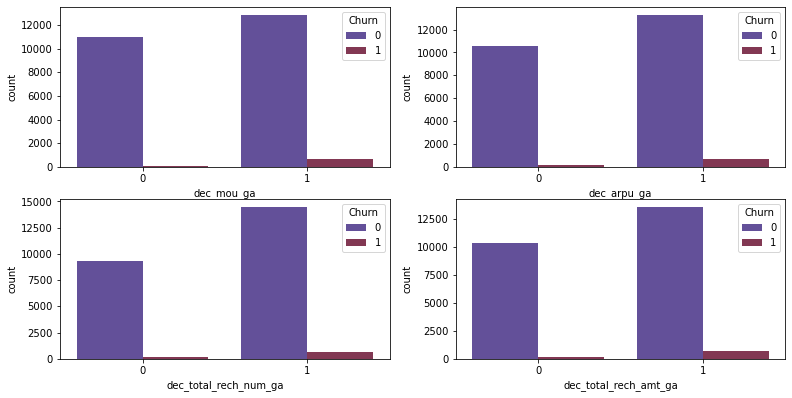

In [55]:
#Univariate Analysis of Categorical variables
ccols = ['dec_mou_ga','dec_arpu_ga','dec_total_rech_num_ga','dec_total_rech_amt_ga']
plt.figure(figsize=[13,10])
i=1
for c in ccols:
    plt.subplot(3,2,i)
    sns.countplot(df[c], hue=df['Churn'],palette='twilight')
    i+=1
plt.show()

There is a slight increase in churning customers when there is a decrease in the minutes of usage, average revenue per user, number of recharges and the recharge amount in the action phase compared to the good phase.

## Bivariate Analysis

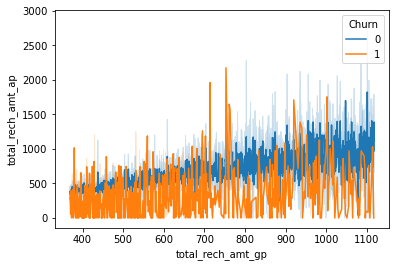

In [56]:
#Checking the trend between the Recharge amounts and the churn rate
sns.lineplot(data=df, x='total_rech_amt_gp', y='total_rech_amt_ap', hue='Churn')
plt.show()

Here it is clearly visible that non-churning customers have recharged for almost equal amounts in the action phase and the good phase while churning customers have mostly recharged for lesser amounts in the action phase compared to the good phase. This will make our metric 'dec_total_rech_amt_ga' a really good indicator.

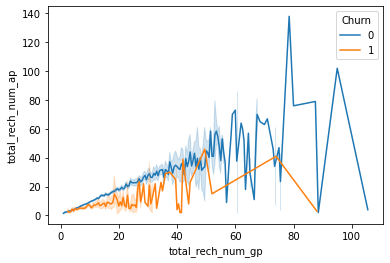

In [57]:
#Checking the trend of the number of recharges with churn rate
sns.lineplot(data=df, x='total_rech_num_gp', y='total_rech_num_ap', hue='Churn')
plt.show()

Here we can see that the non-churners have a higher slope compared to churners. This means that non-churners have almost charged equal number of times in the good phase and action phase while the number of recharges by churning customers have decreased.

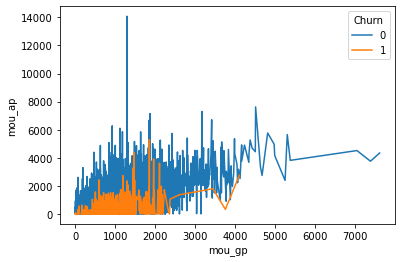

In [58]:
#Checking the trend of the minutes of usage and the Churn rate
sns.lineplot(data=df, x='mou_gp', y='mou_ap', hue='Churn')
plt.show()

Here we see that the non-churning customers have more minutes of usage in the action phase compared to the churning customers.

In [59]:
#Checking the head of the dataframe
df.head()

arpu_ap  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8   137.362         94.66           0.00           0.00           0.00   
13  593.260        413.31          23.53         144.24          72.11   
16  187.894        296.29           0.00           2.83           0.00   
17   25.499         61.64           0.00           4.76           4.81   
21  637.760        757.93           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
8              12.49             80.96             70.58             50.54   
13             36.01            151.13             47.28            294.46   
16             67.38            273.29            145.99            128.28   
17              0.00             58.54              0.00              0.00   
21             23.34             91.81             87.93            104.81   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
8               0.00              0.00              0.00               0.0   
13              4.54              0.00             23.51               0.0   
16              0.00              4.48             10.26               0.0   
17              0.00              0.00              0.00               0.0   
21              0.75              0.00              1.58               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_8  \
8                0.0              7.15        378.09         63.04   
13               0.0              0.49        205.31        353.99   
16               0.0              0.00        315.91        205.93   
17               0.0              0.00         97.54          0.00   
21               0.0              0.00         97.04        129.74   

    std_og_t2t_mou_6  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             116.56             22.58             13.69             10.04   
13            446.41            498.23            255.36             52.94   
16              7.89              3.23             22.99             64.51   
17           1146.91              0.00              1.55              0.00   
21             97.93             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               0.0               0.0               0.0   
21            876.99               0.0               0.0               0.0   

    std_og_mou_6  std_og_mou_7  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
8         130.26        143.48           0.0           0.0          0.00   
13        701.78        138.93           0.0           0.0          1.29   
16         30.89         67.09           0.0           0.0          0.00   
17       1148.46          0.81           0.0           0.0          0.00   
21        763.29        934.69           0.0           0.0          0.00   

    spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
8           0.00          0.00         10.23         0.00          0.0   
13          0.00          0.00          4.78         0.00          0.0   
16          0.00          3.26          5.91         0.00          0.0   
17          2.58          0.00          0.00         0.93          0.0   
21          0.00    

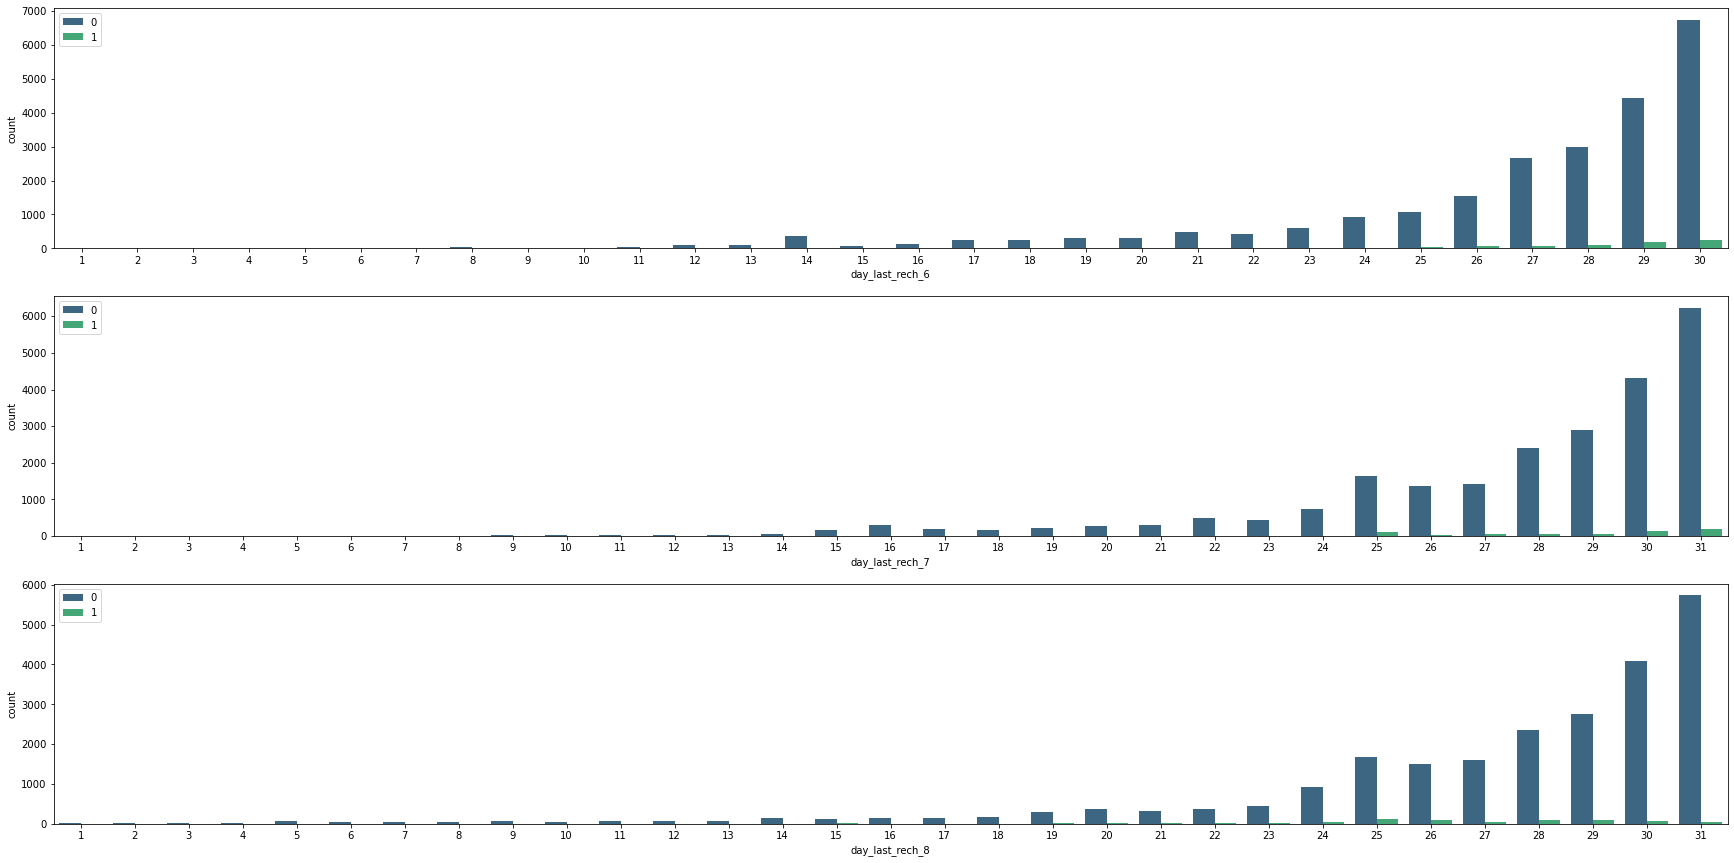

In [60]:
#Checking if there is any relation between day of last recharge and churn
dcols=['day_last_rech_6','day_last_rech_7','day_last_rech_8']
plt.figure(figsize=[30,15])
i=1
for c in dcols:
    plt.subplot(3,1,i)
    sns.countplot(df[c], hue=df['Churn'], palette='viridis')
    i+=1
    plt.legend(loc='upper left')
plt.show()

<AxesSubplot:xlabel='day_last_rech_8'>

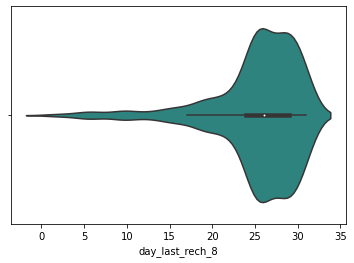

In [61]:
#Checking the relation between day of last recharge of churning customer in the action phase
sns.violinplot(x=df[df['Churn']==1]['day_last_rech_8'], palette='viridis')

Here interestingly we can observe that most of the churning customers recharge a bit earlier than the 31st of the month in the action phase.

### TRAIN TEST SPLIT

In [62]:
#Importing the module
from sklearn.model_selection import train_test_split

#putting target variable to y 
y = df['Churn']

#putting feature variables into X
X = df.drop('Churn', axis =1)

In [63]:
#Splitting the train test data into 80-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

##### Checking the shapes of the datasets.

In [64]:
X_train.shape

(19739, 114)

In [65]:
y_train.shape

(19739,)

In [66]:
X_test.shape

(4935, 114)

In [67]:
y_test.shape

(4935,)

### Dealing with class imbalance 


In [68]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [69]:
#Instantiating ADASYN 
ads = ADASYN(random_state = 73, n_neighbors=5)
X_resampled, y_resampled = ads.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 19088), (1, 19123)]


Here the class imbalance has been dealt with to a very good extent.

### Feature Scaling 

In [70]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

#Instantiating the scaler 
scaler = StandardScaler()

In [71]:
#List of the all the columns.
colmn_scale = X_resampled.columns.to_list()

#Removing the categorical columns.
colmn_scale.remove('dec_mou_ga')
colmn_scale.remove('dec_arpu_ga')
colmn_scale.remove('dec_total_rech_num_ga')
colmn_scale.remove('dec_total_rech_amt_ga')

In [72]:
#Fitting and transforming the data.
X_resampled[colmn_scale] = scaler.fit_transform(X_resampled[colmn_scale])

In [73]:
X_resampled.describe()

arpu_ap  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  \
count  3.821100e+04  3.821100e+04   3.821100e+04   3.821100e+04   
mean   2.740241e-16 -9.623037e-18   5.591647e-15   3.800723e-14   
std    1.000013e+00  1.000013e+00   1.000013e+00   1.000013e+00   
min   -2.589075e+00 -1.033563e+00  -2.363059e-01  -2.243180e-01   
25%   -7.340175e-01 -6.787110e-01  -2.363059e-01  -2.243180e-01   
50%   -9.586691e-02 -3.200583e-01  -2.363059e-01  -2.243180e-01   
75%    5.588069e-01  3.170514e-01  -2.047871e-01  -1.622724e-01   
max    1.905997e+01  7.881477e+00   2.893301e+01   3.461929e+01   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   3.821100e+04   3.821100e+04   3.821100e+04   3.821100e+04   
mean    2.994077e-14   1.114520e-14  -5.705148e-14   5.398989e-15   
std     1.000013e+00   1.000013e+00   1.000013e+00   1.000013e+00   
min    -2.761258e-01  -3.162250e-01  -3.627036e-01  -4.356996e-01   
25%    -2.761258e-01  -3.162250e-01  -3.627036e-01  -4.356996e-01   
50%    -2.543543e-01  -3.162250e-01  -3.627036e-01  -3.867816e-01   
75%    -1.196234e-01  -2.510609e-01  -1.514009e-01  -2.757351e-02   
max     4.196508e+01   1.885402e+01   1.419304e+01   1.751489e+01   

       loc_og_t2t_mou_6  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      3.821100e+04      3.821100e+04      3.821100e+04      3.821100e+04   
mean       1.369888e-15     -4.938242e-15      2.879918e-15     -4.782899e-15   
std        1.000013e+00      1.000013e+00      1.000013e+00      1.000013e+00   
min       -3.861610e-01     -3.259575e-01     -7.284951e-01     -7.345579e-01   
25%       -3.434549e-01     -3.229854e-01     -5.815515e-01     -5.983364e-01   
50%       -2.513265e-01     -2.529115e-01     -3.467859e-01     -3.528243e-01   
75%       -2.064647e-02     -4.407650e-02      1.966250e-01      1.978555e-01   
max        3.084226e+01      4.408146e+01      1.494746e+01      1.712723e+01   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
count      3.821100e+04      3.821100e+04      3.821100e+04      3.821100e+04   
mean      -1.166455e-14     -3.424283e-14     -1.839271e-14     -1.820434e-14   
std        1.000013e+00      1.000013e+00      1.000013e+00      1.000013e+00   
min       -5.974301e-01     -2.952018e-01     -2.896383e-01     -2.673056e-01   
25%       -5.798964e-01     -2.952018e-01     -2.896383e-01     -2.673056e-01   
50%       -3.995808e-01     -2.952018e-01     -2.896383e-01     -2.673056e-01   
75%        1.583533e-01     -1.362621e-01     -1.472820e-01     -1.745787e-01   
max        2.051246e+01      3.563810e+01      2.673160e+01      4.481558e+01   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
count      3.821100e+04      3.821100e+04      3.821100e+04  3.821100e+04   
mean       3.106320e-16     -1.617600e-15     -7.694885e-16  1.857548e-15   
std        1.000013e+00      1.000013e+00      1.000013e+00  1.000013e+00   
min       -1.922668e-01     -2.516720e-01     -2.279211e-01 -7.121604e-01   
25%       -1.922668e-01     -2.516720e-01     -2.279211e-01 -5.650582e-01   
50%       -1.922668e-01     -2.516720e-01     -2.279211e-01 -3.331666e-01   
75%       -1.351265e-01     -1.451498e-01     -1.934552e-01  1.864869e-01   
max        3.996237e+01      7.665171e+01      5.751558e+01  1.942488e+01   

       loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_8  std_og_t2m_mou_6  \
count  3.821100e+04      3.821100e+04      3.821100e+04      3.821100e+04   
mean  -3.411367e-14      4.365285e-15      3.964247e-15     -7.820316e-16   
std    1.000013e+00      1.000013e+00      1.000013e+00      1.000013e+00   
min   -5.902521e-01     -6.433037e-01     -4.566945e-01     -6.720822e-01   
25%   -5.691255e-01     -6.391333e-01     -4.566945e-01     -6.380707e-01   
50%   -3.856769e-01     -4.688380e-01     -4.342339e-01     -4.301398e-01   
75%    1.711487e-01      2.155078e-01     -8.068855e-02      2.248534e-01   
max    2.673991e

In [74]:
#Performing scaling  on  X_test.
X_test[colmn_scale] = scaler.transform(X_test[colmn_scale])
X_test.describe()

arpu_ap  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  4935.000000   4935.000000    4935.000000    4935.000000    4935.000000   
mean      0.386136     -0.099035      -0.069736      -0.114035      -0.157049   
std       1.018784      0.879896       0.671584       0.679937       0.634927   
min      -1.362909     -1.033563      -0.236306      -0.224318      -0.276126   
25%      -0.270497     -0.690064      -0.236306      -0.224318      -0.276126   
50%       0.220506     -0.331940      -0.236306      -0.224318      -0.276126   
75%       0.866274      0.199513      -0.236306      -0.224318      -0.276126   
max      14.904010      6.470240      11.789557      26.064571      17.278379   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count    4935.000000    4935.000000    4935.000000       4935.000000   
mean       -0.094916      -0.198118      -0.250387          0.143593   
std         0.776179       0.686749       0.828387          1.270065   
min        -0.316225      -0.362704      -0.435700         -0.386161   
25%        -0.316225      -0.362704      -0.435700         -0.332854   
50%        -0.316225      -0.362704      -0.435700         -0.191038   
75%        -0.316225      -0.362704      -0.435700          0.136937   
max        10.403890      11.473178      18.023933         24.086036   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count       4935.000000       4935.000000       4935.000000       4935.000000   
mean           0.252808          0.286545          0.370723          0.440613   
std            1.418537          1.203919          1.280777          1.286162   
min           -0.325957         -0.728495         -0.734558         -0.597430   
25%           -0.272329         -0.533397         -0.505019         -0.423043   
50%           -0.111707         -0.117266         -0.054201          0.032031   
75%            0.260920          0.695138          0.804942          0.821353   
max           34.439319         13.975132         12.716536         21.275696   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count       4935.000000       4935.000000       4935.000000       4935.000000   
mean           0.149734          0.175743          0.206405         -0.009707   
std            1.225067          1.292723          1.310341          0.809629   
min           -0.295202         -0.289638         -0.267306         -0.192267   
25%           -0.295202         -0.289638         -0.267306         -0.192267   
50%           -0.264277         -0.260309         -0.240484         -0.192267   
75%            0.060075          0.068756          0.109733         -0.192267   
max           25.253088         22.393663         18.995360         21.422795   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_8  \
count       4935.000000       4935.000000   4935.000000   4935.000000   
mean          -0.003682          0.056269      0.276570      0.443318   
std            1.168970          1.066581      1.206130      1.304575   
min           -0.251672         -0.227921     -0.712160     -0.590252   
25%           -0.251672         -0.227921     -0.511577     -0.398148   
50%           -0.251672         -0.227921     -0.087008      0.070834   
75%           -0.238173         -0.203303      0.659434      0.802961   
max           48.524494         24.900998     15.086602     20.483234   

       std_og_t2t_mou_6  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
count       4935.000000       4935.000000       4935.000000       4935.000000   
mean          -0.234820          0.049250         -0.223820         -0.170669   
std            0.813531          1.096130          0.831477          0.892248   
min           -0.643304         -0.456694         -0.672082         -0.662998   
25%           -0.643304         -0.456694         -0.668144         -0.659281   
50%           -0.617693     

> The train and test data has been scaled.

### Principal Component Analysis

In [75]:
#Importing PCA
from sklearn.decomposition import PCA

In [76]:
#Instantiating pca
pca = PCA(random_state=73)

In [77]:
#Fitting train set on PCA
pca.fit(X_resampled)

PCA(random_state=73)

In [78]:
#Principal Components
pca.components_

array([[ 2.20899063e-01, -8.38328479e-02,  7.11007531e-03, ...,
         2.37154926e-02,  2.17375628e-01, -7.32576887e-02],
       [ 1.55666016e-01,  1.60293042e-01, -7.41515714e-02, ...,
         2.23871517e-01,  3.00812650e-02, -2.01980432e-02],
       [ 1.25805851e-01, -1.32180402e-01,  1.00289633e-02, ...,
        -1.77766195e-01,  2.27880105e-01, -8.08035093e-02],
       ...,
       [ 2.32503910e-07,  2.71046091e-07,  3.98140743e-08, ...,
        -2.98920785e-04, -1.15361343e-04, -1.69365234e-07],
       [-0.00000000e+00,  1.38605463e-16, -2.74119547e-17, ...,
         5.13300291e-14,  2.63899597e-14, -9.82014289e-17],
       [ 6.65897128e-01,  2.22044605e-16, -1.38777878e-16, ...,
        -3.81639165e-16,  3.59933437e-15,  1.04083409e-16]])

In [79]:
#Variance explained by each component
pca.explained_variance_ratio_

array([9.61300716e-02, 7.03071424e-02, 5.27151840e-02, 4.64673847e-02,
       4.19852678e-02, 3.65087473e-02, 3.16915907e-02, 2.64949534e-02,
       2.55431167e-02, 2.49361457e-02, 2.38104686e-02, 2.24356859e-02,
       2.13019012e-02, 2.02575150e-02, 1.91687466e-02, 1.78176332e-02,
       1.71114647e-02, 1.63256671e-02, 1.45441452e-02, 1.43004235e-02,
       1.41963467e-02, 1.30358665e-02, 1.24683522e-02, 1.21993529e-02,
       1.13113170e-02, 1.10550968e-02, 1.02706839e-02, 9.65449249e-03,
       9.37155801e-03, 8.86340023e-03, 8.66481435e-03, 8.44032928e-03,
       8.22575081e-03, 7.85401115e-03, 7.75450664e-03, 7.08034444e-03,
       6.94985590e-03, 6.78541391e-03, 6.32233954e-03, 6.29638276e-03,
       6.14937787e-03, 5.94748940e-03, 5.80986184e-03, 5.68825280e-03,
       5.66433557e-03, 5.47235799e-03, 5.45095786e-03, 5.17705701e-03,
       5.13760113e-03, 4.81571863e-03, 4.75117189e-03, 4.52023796e-03,
       4.39007733e-03, 4.28721330e-03, 4.15438563e-03, 4.10559103e-03,
      

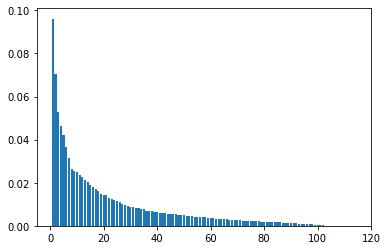

In [80]:
#Visualising the variance explained by each component.
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [81]:
#Cumulative Variance of the Principal Components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.09613007, 0.16643721, 0.2191524 , 0.26561978, 0.30760505,
       0.3441138 , 0.37580539, 0.40230034, 0.42784346, 0.4527796 ,
       0.47659007, 0.49902576, 0.52032766, 0.54058518, 0.55975392,
       0.57757155, 0.59468302, 0.61100869, 0.62555283, 0.63985326,
       0.6540496 , 0.66708547, 0.67955382, 0.69175317, 0.70306449,
       0.71411959, 0.72439027, 0.73404476, 0.74341632, 0.75227972,
       0.76094454, 0.76938487, 0.77761062, 0.78546463, 0.79321913,
       0.80029948, 0.80724933, 0.81403475, 0.82035709, 0.82665347,
       0.83280285, 0.83875034, 0.8445602 , 0.85024845, 0.85591279,
       0.86138515, 0.8668361 , 0.87201316, 0.87715076, 0.88196648,
       0.88671765, 0.89123789, 0.89562797, 0.89991518, 0.90406957,
       0.90817516, 0.91218499, 0.9160529 , 0.919686  , 0.92329008,
       0.92679997, 0.93014895, 0.93332566, 0.93644924, 0.93952805,
       0.94248643, 0.94533764, 0.94801419, 0.95064901, 0.95321774,
       0.95575689, 0.95819666, 0.96062161, 0.96298757, 0.96527

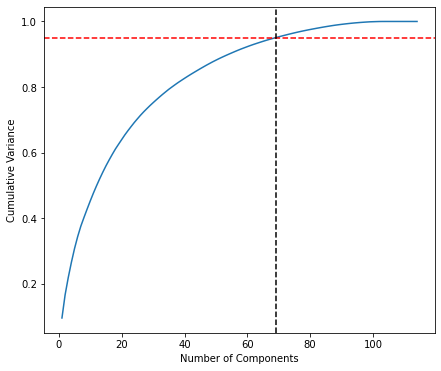

In [82]:
#Plotting the scree plot
plt.figure(figsize=(7,6))
plt.plot(range(1, len(var_cumu)+1), var_cumu)
plt.axhline(0.95, color='red', linestyle='--')
plt.axvline(69, color='black', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

> It is evident that 70 components explain more than 95% of the variance of the data, and hence, performing PCA with 70 components.

#### Performing PCA with 70 components

In [83]:
#Importing Incremental PCA
from sklearn.decomposition import IncrementalPCA

In [84]:
#Instantiating PCA with 60 components
pca_1 = IncrementalPCA(n_components = 70)

In [85]:
#Fitting and transforming on X_train data.
X_train_pca = pca_1.fit_transform(X_resampled)
#Over-riding the y_train dataset
y_train = y_resampled

In [86]:
#Transforming on X_test data.
X_test_pca = pca_1.transform(X_test)

> Here we have fitted and transformed the train data set and then we have transformed the test set using PCA.

#### Evaluation metrics emphasized in upcoming models.

Here we give more emphasis to **Recall** as the evaluation metric since we need to find the churning customers as a priority rather than non-churning customers. Hence, we want our True Positives to be high and our False Negatives to be low. Hence, we choose **Recall or Sensitivity** as our primary evaluation metric. It is ok for the business to hand out offers to a few non-churning customers at the gain of retaining high value customers who are about to churn.

In [87]:
#Creating a function to plot the ROC-AUC Curve
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = "ROC Curve (Area=%0.2f)" % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [88]:
#Creating a function to evaluate the results of the model
def get_evaluation(a,b):
    confusion = metrics.confusion_matrix(a,b)
    #Assigning the True Negatives
    TN = confusion[0,0]
    #Assigning the False Positives
    FP = confusion[0,1]
    #Assigning the False Negatives
    FN = confusion[1,0]
    #Assigning the True Positives
    TP = confusion[1,1]
    print('Confusion Matrix\n----------------')
    print(confusion)
    print(f'\nThe accuracy of the model on the data is: {(TP+TN)/(TP+FP+TN+FN)}')
    print(f'\nThe Sensitivity/Recall of the model on the data is: {TP/(TP+FN)}')
    print(f'\nThe Specificity of the model on the data is: {TN/(TN+FP)}')
    return None

In [89]:
#Creating a function to get the parameters for different thresholds
def plot_sensitivity_specificity_trade_off(actual,probs):
    df_thres = pd.DataFrame(columns=['Actual','Probs'])
    df_thres['Actual'] = actual
    df_thres['Probs'] = probs
    values=[float(x)/10 for x in range(10)]
    for i in values:
        df_thres[i] = df_thres['Probs'].map(lambda x : 1 if x>i else 0)
        
    #Creating a DataFrame with the values of accuracy, sensitivity and specificity against each threshold value
    threshold_df = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])
    for i in values:
        conf = metrics.confusion_matrix(df_thres['Actual'], df_thres[i])
        accuracy = metrics.accuracy_score(df_thres['Actual'], df_thres[i])
        sens = conf[1,1]/(conf[1,1]+conf[1,0])
        spec = conf[0,0]/(conf[0,0]+conf[0,1])
        threshold_df.loc[i] = [i,accuracy,sens,spec]
        
    #Plotting the accuracy, sensitivity and specificity of the various thresholds
    threshold_df.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
    plt.axvline(0.5, color='black', linestyle='--')
    plt.show()

### Logistic Regression with PCA

In [90]:
#Importing logistic regression module from scikit learn library.
from sklearn.linear_model import LogisticRegression

In [91]:
#Importing metrics module
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [92]:
#Importing libraries for cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [93]:
#Creating k-fold objects with 5 splits.
fold = KFold(n_splits = 5, shuffle = True, random_state= 42)

#parameter dictionary
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#Performing GridSearch
model_log = GridSearchCV(estimator = LogisticRegression(), param_grid = params, cv = fold, scoring = 'roc_auc', verbose = 1,
                        n_jobs = -1, return_train_score = True)

In [94]:
#Fitting the model
model_log.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [95]:
#Creating a dataframe with GridSearch results
log_grid = pd.DataFrame(model_log.cv_results_)
log_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.719721      0.212682         0.068089        0.056528   0.001   
1       1.057623      0.356294         0.010020        0.001482    0.01   
2       1.887253      0.262164         0.021268        0.007191     0.1   
3       3.043009      0.208107         0.025907        0.026413       1   
4       2.386827      0.211858         0.017151        0.007830      10   
5       2.301761      0.153184         0.011040        0.003881     100   
6       1.915624      0.308175         0.010381        0.001886    1000   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.924390           0.924521           0.921706   
1   {'C': 0.01}           0.928652           0.928975           0.925238   
2    {'C': 0.1}           0.929234           0.929336           0.925499   
3      {'C': 1}           0.929606           0.929457           0.925737   
4     {'C': 10}           0.930027           0.929457           0.926032   
5    {'C': 100}           0.930051           0.929411           0.926118   
6   {'C': 1000}           0.930051           0.929360           0.926121   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.926602           0.925928         0.924630        0.001685   
1           0.931171           0.931885         0.929184        0.002330   
2           0.931812           0.932557         0.929688        0.002475   
3           0.932149           0.932839         0.929958        0.002502   
4           0.932437           0.932947         0.930180        0.002470   
5           0.932477           0.932777         0.930167        0.002414   
6           0.932475           0.932892         0.930180        0.002441   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.925581            0.925463   
1                6            0.930546            0.930295   
2                5            0.931139            0.930915   
3                4            0.931419            0.931242   
4                1            0.931651            0.931516   
5                3            0.931608            0.931522   
6                2            0.931635            0.931524   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.926166            0.924899            0.924752   
1            0.931218            0.929655            0.929407   
2            0.931881            0.930215            0.929980   
3            0.932146            0.930468            0.930289   
4            0.932334            0.930657            0.930624   
5            0.932343            0.930669            0.930562   
6            0.932350            0.930647            0.930592   

   mean_train_score  std_train_score  
0          0.925372         0.000508  
1          0.930224         0.000646  
2          0.930826         0.000679  
3          0.931113         0.000674  
4          0.931357         0.000647  
5          0.931341         0.000658  
6          0.931349         0.000660

In [96]:
#Checking the best score and the parameter
best_score = model_log.best_score_
best_param = model_log.best_params_['C']
print(f'best score: {best_score}')
print(f'best parameter: {best_param}')

best score: 0.9301801483146092
best parameter: 10


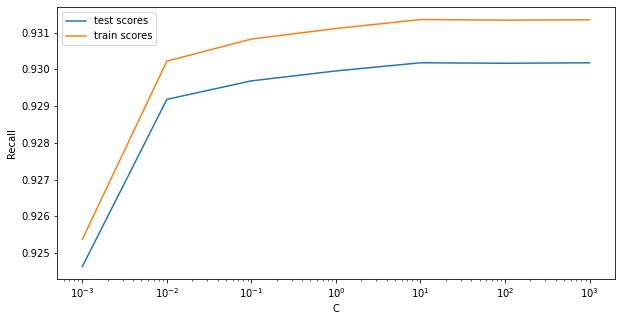

In [97]:
#Visualising the recall scores on the train and test sets 
plt.figure(figsize=[10,5])
plt.plot(log_grid['param_C'], log_grid['mean_test_score'])
plt.plot(log_grid['param_C'], log_grid['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test scores', 'train scores'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with Optimal Hyperparameters

In [98]:
#Instantiating Logistic Regression object with the optimal hyperparameters
log_pca = LogisticRegression(C=best_param)

In [99]:
#Fitting the model on the train dataset
log_pca.fit(X_train_pca,y_train)

LogisticRegression(C=10)

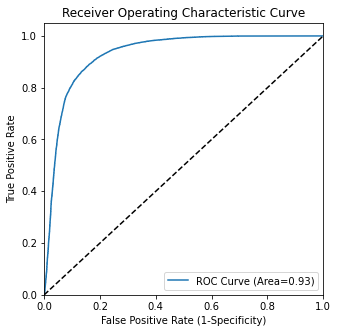

In [100]:
#Plotting the ROC-AUC Curve for Logistic Regression Model
logy_train_probs=log_pca.predict_proba(X_train_pca)[:,1]
draw_roc(y_train,logy_train_probs)

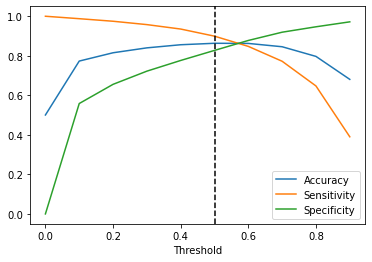

In [101]:
#Plotting the sensitivity-specificity tradeoff at different thresholds
plot_sensitivity_specificity_trade_off(y_train, logy_train_probs)

Here we see that the optimum threshold value is between 0.5 and 0.6. But here we go for a threshold of 0.5 as we want a higher Recall value even if it is at the cost of some specificity as the company doesn't want to lose its high value customers as much as possible.

#### Prediction on the train set using the model

In [102]:
#Predicting on the train dataset
log_probs_df = pd.DataFrame(logy_train_probs)
y_train_pred = log_probs_df[0].apply(lambda x : 1 if x>0.5 else 0)

In [103]:
#Getting the evaluation metrics
get_evaluation(y_train,y_train_pred)

Confusion Matrix
----------------
[[15790  3298]
 [ 1927 17196]]

The accuracy of the model on the data is: 0.8632592708905813

The Sensitivity/Recall of the model on the data is: 0.8992312921612717

The Specificity of the model on the data is: 0.8272212908633697


#### Prediction on the test set using the model

In [104]:
#Predicting on the test dataset
y_test_probs = log_pca.predict_proba(X_test_pca)[:,1]
y_test_probs_df = pd.DataFrame(y_test_probs)
y_test_pred = y_test_probs_df[0].apply(lambda x : 1 if x>0.5 else 0)

In [105]:
#Getting the evaluation metrics
get_evaluation(y_test,y_test_pred)

Confusion Matrix
----------------
[[4006  772]
 [  30  127]]

The accuracy of the model on the data is: 0.8374873353596758

The Sensitivity/Recall of the model on the data is: 0.8089171974522293

The Specificity of the model on the data is: 0.8384261197153621


***Model Summary***<br><br>

**Train Dataset**<br><br>
Accuracy = 86.3%<br><br>
Sensitivity/Recall = 89.9%<br><br>
Specificity = 82.7%<br><br>

**Test Dataset**<br><br>
Accuracy = 83.7%<br><br>
Sensitivity/Recall = 80.8%<br><br>
Specificity = 83.8%<br><br>

## Decision Tree with PCA

In [106]:
#Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [107]:
#Creating the parameter grid
paramsdt = {
    'max_depth': range(5, 15, 2),
    'min_samples_leaf': range(50, 150, 25),
    'min_samples_split': range(50, 150, 25),
}

In [108]:
#Instantiating a Decision Tree Object
dt=DecisionTreeClassifier()

#Setting up GridSearch
dt_grid = GridSearchCV(estimator=dt,param_grid=paramsdt,scoring='roc_auc',cv=5,n_jobs=-1,verbose=1)

#Fitting the model on the data
dt_grid.fit(X_train_pca,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 2),
                         'min_samples_leaf': range(50, 150, 25),
                         'min_samples_split': range(50, 150, 25)},
             scoring='roc_auc', verbose=1)

In [109]:
#Getting the results
dt_grid_res = pd.DataFrame(dt_grid.cv_results_)
dt_grid_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.428586      0.493147         0.011878        0.001803   
1       4.144392      0.728587         0.008836        0.000743   
2       3.788775      0.716703         0.009208        0.002671   
3       4.046577      0.805219         0.014252        0.008147   
4       4.284027      0.761985         0.012685        0.006315   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                      75   
2               5                     50                     100   
3               5                     50                     125   
4               5                     75                      50   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.915947   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.915963   
2  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.915998   
3  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.915564   
4  {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.914153   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.892740           0.878922           0.871781           0.878876   
1           0.892680           0.878922           0.871766           0.878526   
2           0.892680           0.878922           0.871732           0.879628   
3           0.892997           0.879334           0.871157           0.879119   
4           0.893968           0.878342           0.873067           0.882503   

   mean_test_score  std_test_score  rank_test_score  
0         0.887653        0.015695               71  
1         0.887571        0.015739               74  
2         0.887792        0.015638               69  
3         0.887634        0.015632               72  
4         0.888407        0.014596               68

In [110]:
#Getting the best score and the best parameters
print(f'Best Score:{dt_grid.best_score_}')
print(f'Best Estimator:{dt_grid.best_estimator_}')

Best Score:0.9164150095363361
Best Estimator:DecisionTreeClassifier(max_depth=13, min_samples_leaf=50, min_samples_split=75)


#### Model with Optimal Parameters

In [111]:
dt_pca = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=7, min_samples_leaf=100, min_samples_split=125)

#Fitting the model on the data
dt_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100, min_samples_split=125,
                       random_state=42)

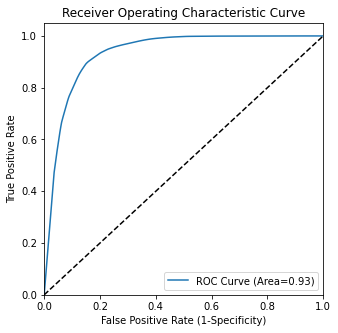

In [112]:
#Plotting the ROC-AUC Curve to check the effectiveness of the model
dty_train_probs = dt_pca.predict_proba(X_train_pca)[:,1]
draw_roc(y_train, dty_train_probs)

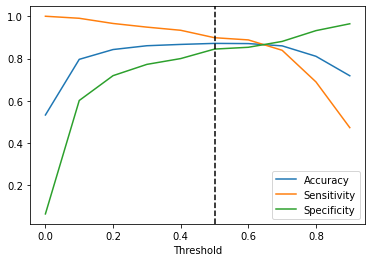

In [113]:
#Plotting the sensitivity-specificity tradeoff at different thresholds
plot_sensitivity_specificity_trade_off(y_train, dty_train_probs)

Here we see that the optimum threshold value is between 0.6 and 0.7. But here we go for a threshold of 0.6 as we want a higher Recall value even if it is at the cost of some specificity as the company doesn't want to lose its high value customers as much as possible.

#### Predictions on the train set

In [114]:
#Predicting on the train dataset
dt_probs_df = pd.DataFrame(dty_train_probs)
y_train_pred = dt_probs_df[0].apply(lambda x : 1 if x>0.6 else 0)

In [115]:
#Getting the evaluation metrics
get_evaluation(y_train,y_train_pred)

Confusion Matrix
----------------
[[16285  2803]
 [ 2141 16982]]

The accuracy of the model on the data is: 0.8706131742168486

The Sensitivity/Recall of the model on the data is: 0.8880405794069968

The Specificity of the model on the data is: 0.8531538139145013


#### Predictions on the test set

In [116]:
#Predicting on the test dataset
y_test_probs = dt_pca.predict_proba(X_test_pca)[:,1]
y_test_probs_df = pd.DataFrame(y_test_probs)
y_test_pred = y_test_probs_df[0].apply(lambda x : 1 if x>0.6 else 0)

In [117]:
#Getting the evaluation metrics
get_evaluation(y_test,y_test_pred)

Confusion Matrix
----------------
[[4035  743]
 [  35  122]]

The accuracy of the model on the data is: 0.8423505572441743

The Sensitivity/Recall of the model on the data is: 0.7770700636942676

The Specificity of the model on the data is: 0.8444956048555882


***Model Summary***<br><br>

**Train Dataset**<br><br>
Accuracy = 87.0%<br><br>
Sensitivity/Recall = 88.8%<br><br>
Specificity = 85.3%<br><br>

**Test Dataset**<br><br>
Accuracy = 84.2%<br><br>
Sensitivity/Recall = 77.7%<br><br>
Specificity = 84.4%<br><br>

## Random Forest with PCA

In [118]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#### Hyperparameter Tuning

In [119]:
#Creating the parameter grid for GridSearchCV
paramsrf = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20, 30]
}
#Instantiating a Random Forest Classifier object
rf = RandomForestClassifier()

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = paramsrf, scoring='roc_auc', cv = 5, n_jobs = -1, verbose = 1, 
                       return_train_score=True)

# Fitting the model on the data
rf_grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5),
                         'max_features': [10, 20, 30],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [120]:
#Checking the results
rf_grid_res = pd.DataFrame(rf_grid.cv_results_)
rf_grid_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      47.072136      2.738218         0.226018        0.044723   
1      83.021531      7.140906         0.349345        0.024357   
2     113.711061      3.919992         0.688215        0.111995   
3      40.022012      1.360957         0.220909        0.046079   
4      77.581533      1.479495         0.398012        0.050758   

  param_max_depth param_max_features param_min_samples_leaf  \
0               5                 10                     50   
1               5                 10                     50   
2               5                 10                     50   
3               5                 10                     50   
4               5                 10                     50   

  param_min_samples_split param_n_estimators  \
0                      50                100   
1                      50                200   
2                      50                300   
3                     100                100   
4                     100                200   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'max_features': 10, 'min_samp...           0.928928   
1  {'max_depth': 5, 'max_features': 10, 'min_samp...           0.929182   
2  {'max_depth': 5, 'max_features': 10, 'min_samp...           0.928092   
3  {'max_depth': 5, 'max_features': 10, 'min_samp...           0.926011   
4  {'max_depth': 5, 'max_features': 10, 'min_samp...           0.927347   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.913885           0.912413           0.907202           0.901171   
1           0.915569           0.914376           0.906551           0.901203   
2           0.916329           0.914414           0.909691           0.903498   
3           0.913949           0.914468           0.908269           0.903907   
4           0.915919           0.915418           0.906028           0.903040   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.912720        0.009252               33            0.929658   
1         0.913376        0.009491               29            0.929843   
2         0.914405        0.008151               26            0.929458   
3         0.913321        0.007442               30            0.927685   
4         0.913550        0.008562               27            0.930151   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.928690            0.930440            0.932395   
1            0.930711            0.931150            0.933379   
2            0.931664            0.929975            0.933768   
3            0.929707            0.929603            0.933361   
4            0.930195            0.931430            0.933151   

   split4_train_score  mean_train_score  std_train_score  
0            0.930425          0.930322         0.001219  
1            0.931651          0.931347         0.001177  
2            0.931713          0.931316         0.001519  
3            0.932841          0.930639         0.002141  
4            0.933035          0.931592         0.001309

In [121]:
#Checking the best score and the best parameters
print(f'Best Score: {rf_grid.best_score_}')
print(f'Best Parameters: {rf_grid.best_params_}')

Best Score: 0.9180122176128528
Best Parameters: {'max_depth': 5, 'max_features': 30, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


#### Model with Optimal Parameters

In [122]:
#Instantiating a model object with the optimal parameters
rf_pca = RandomForestClassifier(bootstrap=True, max_depth=5, min_samples_leaf=50, min_samples_split=100, max_features=20,
                                n_estimators=300)

#Fitting the model on the dataset
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

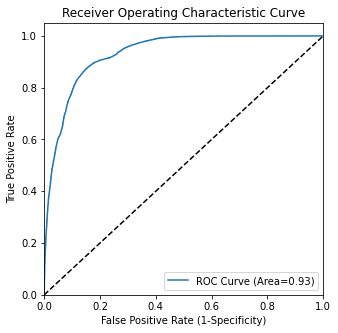

In [123]:
#Plotting the ROC-AUC Curve of the model to check for its effectiveness
rfy_train_probs = rf_pca.predict_proba(X_train_pca)[:,1]
draw_roc(y_train, rfy_train_probs)

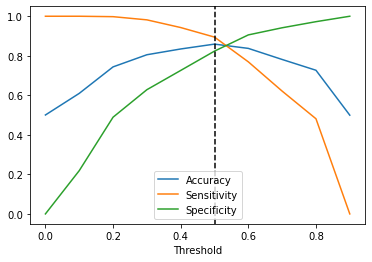

In [124]:
#Plotting the sensitivity-specificity tradeoff at different thresholds
plot_sensitivity_specificity_trade_off(y_train, rfy_train_probs)

Here we see that the optimum threshold value is between 0.5 and 0.6. But here we go for a threshold of 0.5 as we want a higher Recall value even if it is at the cost of some specificity as the company doesn't want to lose its high value customers as much as possible.

#### Predictions on the train dataset

In [125]:
#Predicting on the train dataset
rf_probs_df = pd.DataFrame(rfy_train_probs)
y_train_pred = rf_probs_df[0].apply(lambda x : 1 if x>0.5 else 0)

In [126]:
#Getting the evaluation metrics
get_evaluation(y_train,y_train_pred)

Confusion Matrix
----------------
[[15720  3368]
 [ 2018 17105]]

The accuracy of the model on the data is: 0.8590458245007982

The Sensitivity/Recall of the model on the data is: 0.8944726245881922

The Specificity of the model on the data is: 0.8235540653813914


#### Predictions on the test set

In [127]:
#Predicting on the test dataset
y_test_probs = rf_pca.predict_proba(X_test_pca)[:,1]
y_test_probs_df = pd.DataFrame(y_test_probs)
y_test_pred = y_test_probs_df[0].apply(lambda x : 1 if x>0.5 else 0)

In [128]:
#Getting the evaluation metrics
get_evaluation(y_test,y_test_pred)

Confusion Matrix
----------------
[[3936  842]
 [  32  125]]

The accuracy of the model on the data is: 0.8228976697061804

The Sensitivity/Recall of the model on the data is: 0.7961783439490446

The Specificity of the model on the data is: 0.8237756383424026


***Model Summary***<br><br>

**Train Dataset**<br><br>
Accuracy = 85.6%<br><br>
Sensitivity/Recall = 89.1%<br><br>
Specificity = 82.2%<br><br>

**Test Dataset**<br><br>
Accuracy = 81.9%<br><br>
Sensitivity/Recall = 80.8%<br><br>
Specificity = 81.9%<br><br>

## Final Conclusion with PCA

Here we see that the Recall Score is the same for Logistic Regression with PCA and Random Forest with PCA. But we see that the classic Logistic Regression has higher accuracy as well as specificity and hence proves to be the better model.

### LOGISTIC REGRESSION WITHOUT PCA

In [129]:
# Importing stats model
import statsmodels.api as sm

In [130]:
# Instantiate the model and adding a constant to X_resampled
log_nopca = sm.GLM(y_resampled,(sm.add_constant(X_resampled)), family=sm.families.Binomial())

# Fit the model
log_nopca = log_nopca.fit().summary()

In [131]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Instantiate the logistic regression
logreg = LogisticRegression()

#### Feature Selection using RFE

In [132]:
# Importing RFE
from sklearn.feature_selection import RFE

# Instantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select = 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_resampled, y_resampled)

In [133]:
# RFE selected columns
rfe_colmns = X_resampled.columns[rfe.support_]
print(rfe_colmns)

Index(['loc_og_mou_8', 'isd_og_mou_8', 'og_others_7', 'og_others_8',
       'loc_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_ap',
       'total_rech_amt_6', 'total_rech_amt_7', 'monthly_3g_8', 'mou_diff',
       'total_rech_num_gp', 'total_rech_num_diff', 'dec_total_rech_num_ga',
       'total_rech_amt_gp'],
      dtype='object')


#### Creating Model-1 with RFE selected columns.

In [134]:
# Adding constant to X_train
X_train_sm1 = sm.add_constant(X_resampled[rfe_colmns])

#Instantiate the model
log_nopca_1 = sm.GLM(y_resampled, X_train_sm1, family=sm.families.Binomial())

# Fit the model
log_nopca_1 = log_nopca_1.fit()

log_nopca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38211
Model:                            GLM   Df Residuals:                    38195
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Jun 2023   Deviance:                       4184.1
Time:                        15:46:29   Pearson chi2:                 5.62e+05
No. Iterations:                    36   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   671.3652   1.86e+05      0.004      0.997   -3.64e+05    3.65e+05
loc_og_mou_8             -2.4056      0.192    -12.516      0.000      -2.782      -2.029
isd_og_mou_8             -1.7927      1.207     -1.485      0.137      -4.158       0.573
og_others_7              -2.1009      2.658     -0.790      0.429      -7.311       3.109
og_others_8           -1613.3320   3.12e+05     -0.005      0.996   -6.13e+05     6.1e+05
loc_ic_t2f_mou_8         -2.0235      0.356     -5.676      0.000      -2.722      -1.325
ic_others_8              -2.0190      0.700     -2.885      0.004      -3.391      -0.647
total_rech_num_ap     -1844.2001   3.42e+06     -0.001      1.000   -6.71e+06     6.7e+06
total_rech_amt_6      -3.602e+05   1.06e+08     -0.003      0.997   -2.08e+08    2.07e+08
total_rech_amt_7      -3.712e+05   1.09e+08     -0.003      0.997   -2.14e+08    2.14e+08
monthly_3g_8             -0.6406      0.129     -4.947      0.000      -0.894      -0.387
mou_diff                 -0.6502      0.058    -11.194      0.000      -0.764      -0.536
total_rech_num_gp      1755.5485   3.26e+06      0.001      1.000   -6.38e+06    6.39e+06
total_rech_num_diff    1563.7079    2.9e+06      0.001      1.000   -5.69e+06    5.69e+06
dec_total_rech_num_ga     0.0012      0.132      0.009      0.993      -0.257       0.260
total_rech_amt_gp      5.113e+05    1.5e+08      0.003      0.997   -2.94e+08    2.95e+08
=========================================================================================
"""


**Summary Analysis**

>It is seen that there are few features have positive coefficients and few have negative coefficients and some features have higher p-values becoming insignificant in the model.

In [135]:
#Importing variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_resampled[rfe_colmns].columns
vif['VIF'] = [variance_inflation_factor(X_resampled[rfe_colmns].values, i) for i in range(X_resampled[rfe_colmns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
14      total_rech_amt_gp  772416.46
8        total_rech_amt_7  407019.75
7        total_rech_amt_6  383173.79
6       total_rech_num_ap     959.24
11      total_rech_num_gp     869.19
12    total_rech_num_diff     691.12
10               mou_diff       1.86
0            loc_og_mou_8       1.36
2             og_others_7       1.23
3             og_others_8       1.23
13  dec_total_rech_num_ga       1.16
4        loc_ic_t2f_mou_8       1.08
9            monthly_3g_8       1.06
1            isd_og_mou_8       1.01
5             ic_others_8       1.01

> It is seen that column "total_rech_amt_gp" has very high VIF and p-value, thus needs to be dropped.

#### Dropping "total_rech_amt_gp" column with high p-value 0.99

In [136]:
# Removing total_rech_amt_gp column 
log_colmns1 = rfe_colmns.to_list()
log_colmns1.remove('total_rech_amt_gp')
print(log_colmns1)

['loc_og_mou_8', 'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_ap', 'total_rech_amt_6', 'total_rech_amt_7', 'monthly_3g_8', 'mou_diff', 'total_rech_num_gp', 'total_rech_num_diff', 'dec_total_rech_num_ga']


### Building the second model (Model-2) after removing total_rech_amt_gp

In [137]:
# Adding constant to X_train
X_train_sm2 = sm.add_constant(X_resampled[log_colmns1])

#Instantiate the model
log_nopca_2 = sm.GLM(y_resampled, X_train_sm2, family=sm.families.Binomial())

# Fit the model
log_nopca_2 = log_nopca_2.fit()

log_nopca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38211
Model:                            GLM   Df Residuals:                    38196
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Jun 2023   Deviance:                       9699.8
Time:                        15:46:32   Pearson chi2:                 8.84e+06
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.178e+05   1.93e+05      3.725      0.000     3.4e+05     1.1e+06
loc_og_mou_8             -3.2058      0.131    -24.414      0.000      -3.463      -2.948
isd_og_mou_8             -2.4108      0.850     -2.835      0.005      -4.077      -0.744
og_others_7              -0.8657      1.232     -0.703      0.482      -3.280       1.549
og_others_8           -2034.5080   3.41e+05     -0.006      0.995    -6.7e+05    6.66e+05
loc_ic_t2f_mou_8         -1.3409      0.152     -8.803      0.000      -1.639      -1.042
ic_others_8              -1.7805      0.373     -4.774      0.000      -2.511      -1.050
total_rech_num_ap     -2.551e+07   6.84e+06     -3.727      0.000   -3.89e+07   -1.21e+07
total_rech_amt_6          0.0419      0.030      1.419      0.156      -0.016       0.100
total_rech_amt_7          0.0309      0.028      1.117      0.264      -0.023       0.085
monthly_3g_8             -1.1033      0.134     -8.244      0.000      -1.366      -0.841
mou_diff                 -0.6920      0.038    -18.030      0.000      -0.767      -0.617
total_rech_num_gp      2.429e+07   6.52e+06      3.727      0.000    1.15e+07    3.71e+07
total_rech_num_diff    2.164e+07    5.8e+06      3.727      0.000    1.03e+07     3.3e+07
dec_total_rech_num_ga    -0.5900      0.079     -7.488      0.000      -0.744      -0.436
=========================================================================================
"""

> Removing "og_others_8" with high p-value 0.995. 

In [138]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_resampled[log_colmns1].columns
vif['VIF'] = [variance_inflation_factor(X_resampled[log_colmns1].values, i) for i in range(X_resampled[log_colmns1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
6       total_rech_num_ap  685.30
11      total_rech_num_gp  622.28
12    total_rech_num_diff  497.35
10               mou_diff    1.82
0            loc_og_mou_8    1.34
7        total_rech_amt_6    1.25
2             og_others_7    1.23
3             og_others_8    1.23
13  dec_total_rech_num_ga    1.16
8        total_rech_amt_7    1.11
4        loc_ic_t2f_mou_8    1.07
9            monthly_3g_8    1.05
1            isd_og_mou_8    1.00
5             ic_others_8    1.00

In [139]:
# Removing og_others_8 column
log_colmns2 = log_colmns1
log_colmns2.remove('og_others_8')
print(log_colmns2)

['loc_og_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_ap', 'total_rech_amt_6', 'total_rech_amt_7', 'monthly_3g_8', 'mou_diff', 'total_rech_num_gp', 'total_rech_num_diff', 'dec_total_rech_num_ga']


### Building the third model (Model-3) after removing og_others_8 column

In [140]:
# Adding constant to X_train
X_train_sm3 = sm.add_constant(X_resampled[log_colmns2])

#Instantiate the model
log_nopca_3 = sm.GLM(y_resampled, X_train_sm3, family=sm.families.Binomial())

# Fit the model
log_nopca_3 = log_nopca_3.fit()

log_nopca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38211
Model:                            GLM   Df Residuals:                    38197
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4854.3
Date:                Tue, 06 Jun 2023   Deviance:                       9708.7
Time:                        15:46:34   Pearson chi2:                 8.88e+06
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6777
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   7.18e+05   1.93e+05      3.728      0.000    3.41e+05     1.1e+06
loc_og_mou_8             -3.2062      0.131    -24.425      0.000      -3.463      -2.949
isd_og_mou_8             -2.4097      0.849     -2.837      0.005      -4.074      -0.745
og_others_7              -1.1897      1.090     -1.091      0.275      -3.327       0.947
loc_ic_t2f_mou_8         -1.3441      0.152     -8.821      0.000      -1.643      -1.045
ic_others_8              -1.7866      0.373     -4.785      0.000      -2.518      -1.055
total_rech_num_ap     -2.552e+07   6.84e+06     -3.728      0.000   -3.89e+07   -1.21e+07
total_rech_amt_6          0.0422      0.030      1.432      0.152      -0.016       0.100
total_rech_amt_7          0.0314      0.028      1.136      0.256      -0.023       0.086
monthly_3g_8             -1.1035      0.134     -8.245      0.000      -1.366      -0.841
mou_diff                 -0.6919      0.038    -18.074      0.000      -0.767      -0.617
total_rech_num_gp      2.429e+07   6.52e+06      3.728      0.000    1.15e+07    3.71e+07
total_rech_num_diff    2.164e+07    5.8e+06      3.728      0.000    1.03e+07     3.3e+07
dec_total_rech_num_ga    -0.5903      0.079     -7.492      0.000      -0.745      -0.436
=========================================================================================
"""

> We can still see columns having high p-value therefore removing "og_others_7" with 0.27

In [141]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_resampled[log_colmns2].columns
vif['VIF'] = [variance_inflation_factor(X_resampled[log_colmns2].values, i) for i in range(X_resampled[log_colmns2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5       total_rech_num_ap  685.28
10      total_rech_num_gp  622.26
11    total_rech_num_diff  497.34
9                mou_diff    1.82
0            loc_og_mou_8    1.34
6        total_rech_amt_6    1.25
12  dec_total_rech_num_ga    1.16
7        total_rech_amt_7    1.11
3        loc_ic_t2f_mou_8    1.07
8            monthly_3g_8    1.05
1            isd_og_mou_8    1.00
2             og_others_7    1.00
4             ic_others_8    1.00

In [142]:
# Removing og_others_7 column
log_colmns3 = log_colmns2
log_colmns3.remove('og_others_7')
print(log_colmns3)

['loc_og_mou_8', 'isd_og_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_ap', 'total_rech_amt_6', 'total_rech_amt_7', 'monthly_3g_8', 'mou_diff', 'total_rech_num_gp', 'total_rech_num_diff', 'dec_total_rech_num_ga']


### Building the fourth model (Model-4) after removing og_others_7 column

In [143]:
# Adding constant to X_train
X_train_sm4 = sm.add_constant(X_resampled[log_colmns3])

#Instantiate the model
log_nopca_4 = sm.GLM(y_resampled, X_train_sm4, family=sm.families.Binomial())

# Fit the model
log_nopca_4 = log_nopca_4.fit()

log_nopca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38211
Model:                            GLM   Df Residuals:                    38198
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4855.5
Date:                Tue, 06 Jun 2023   Deviance:                       9711.1
Time:                        15:46:36   Pearson chi2:                 9.15e+06
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6777
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.185e+05   1.93e+05      3.731      0.000    3.41e+05     1.1e+06
loc_og_mou_8             -3.2106      0.131    -24.456      0.000      -3.468      -2.953
isd_og_mou_8             -2.4084      0.849     -2.837      0.005      -4.072      -0.745
loc_ic_t2f_mou_8         -1.3426      0.152     -8.813      0.000      -1.641      -1.044
ic_others_8              -1.7908      0.373     -4.796      0.000      -2.523      -1.059
total_rech_num_ap     -2.554e+07   6.84e+06     -3.731      0.000    -3.9e+07   -1.21e+07
total_rech_amt_6          0.0426      0.029      1.446      0.148      -0.015       0.100
total_rech_amt_7          0.0307      0.028      1.112      0.266      -0.023       0.085
monthly_3g_8             -1.1053      0.134     -8.257      0.000      -1.368      -0.843
mou_diff                 -0.6891      0.038    -18.044      0.000      -0.764      -0.614
total_rech_num_gp      2.431e+07   6.52e+06      3.731      0.000    1.15e+07    3.71e+07
total_rech_num_diff    2.166e+07    5.8e+06      3.731      0.000    1.03e+07     3.3e+07
dec_total_rech_num_ga    -0.5909      0.079     -7.500      0.000      -0.745      -0.436
=========================================================================================
"""

> Removing column "total_rech_amt_7" with p-value 0.26

In [144]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_resampled[log_colmns3].columns
vif['VIF'] = [variance_inflation_factor(X_resampled[log_colmns3].values, i) for i in range(X_resampled[log_colmns3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4       total_rech_num_ap  685.25
9       total_rech_num_gp  622.24
10    total_rech_num_diff  497.32
8                mou_diff    1.82
0            loc_og_mou_8    1.34
5        total_rech_amt_6    1.25
11  dec_total_rech_num_ga    1.16
6        total_rech_amt_7    1.11
2        loc_ic_t2f_mou_8    1.07
7            monthly_3g_8    1.05
1            isd_og_mou_8    1.00
3             ic_others_8    1.00

In [145]:
# Removing total_rech_amt_7 column
log_colmns4 = log_colmns3
log_colmns4.remove('total_rech_amt_7')
print(log_colmns4)

['loc_og_mou_8', 'isd_og_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_ap', 'total_rech_amt_6', 'monthly_3g_8', 'mou_diff', 'total_rech_num_gp', 'total_rech_num_diff', 'dec_total_rech_num_ga']


 ### Building the fifth model (Model-5) after removing og_others_7 column

In [146]:
# Adding constant to X_train
X_train_sm5 = sm.add_constant(X_resampled[log_colmns4])

#Instantiate the model
log_nopca_5 = sm.GLM(y_resampled, X_train_sm5, family=sm.families.Binomial())

# Fit the model
log_nopca_5 = log_nopca_5.fit()

log_nopca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38211
Model:                            GLM   Df Residuals:                    38199
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4856.2
Date:                Tue, 06 Jun 2023   Deviance:                       9712.3
Time:                        15:46:38   Pearson chi2:                 8.80e+06
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6777
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.262e+05   1.93e+05      3.771      0.000    3.49e+05     1.1e+06
loc_og_mou_8             -3.1895      0.130    -24.620      0.000      -3.443      -2.936
isd_og_mou_8             -2.3777      0.842     -2.824      0.005      -4.028      -0.727
loc_ic_t2f_mou_8         -1.3406      0.152     -8.810      0.000      -1.639      -1.042
ic_others_8              -1.7879      0.373     -4.792      0.000      -2.519      -1.057
total_rech_num_ap     -2.581e+07   6.84e+06     -3.771      0.000   -3.92e+07   -1.24e+07
total_rech_amt_6          0.0362      0.029      1.251      0.211      -0.021       0.093
monthly_3g_8             -1.0999      0.134     -8.225      0.000      -1.362      -0.838
mou_diff                 -0.6972      0.038    -18.571      0.000      -0.771      -0.624
total_rech_num_gp      2.457e+07   6.52e+06      3.771      0.000    1.18e+07    3.73e+07
total_rech_num_diff    2.189e+07    5.8e+06      3.771      0.000    1.05e+07    3.33e+07
dec_total_rech_num_ga    -0.5879      0.079     -7.466      0.000      -0.742      -0.434
=========================================================================================
"""

>Removing column "total_rech_amt_6" with p-value 0.211

In [147]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_resampled[log_colmns4].columns
vif['VIF'] = [variance_inflation_factor(X_resampled[log_colmns4].values, i) for i in range(X_resampled[log_colmns4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4       total_rech_num_ap  683.99
8       total_rech_num_gp  620.44
9     total_rech_num_diff  496.17
7                mou_diff    1.81
0            loc_og_mou_8    1.29
5        total_rech_amt_6    1.25
10  dec_total_rech_num_ga    1.16
2        loc_ic_t2f_mou_8    1.07
6            monthly_3g_8    1.04
1            isd_og_mou_8    1.00
3             ic_others_8    1.00

In [148]:
# Removing total_rech_amt_6 column
log_colmns5 = log_colmns4
log_colmns5.remove('total_rech_amt_6')
print(log_colmns5)

['loc_og_mou_8', 'isd_og_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_ap', 'monthly_3g_8', 'mou_diff', 'total_rech_num_gp', 'total_rech_num_diff', 'dec_total_rech_num_ga']


 ### Building the sixth model (Model-6) after removing total_rech_amt_6 column

In [149]:
# Adding constant to X_train
X_train_sm6 = sm.add_constant(X_resampled[log_colmns5])

#Instantiate the model
log_nopca_6 = sm.GLM(y_resampled, X_train_sm6, family=sm.families.Binomial())

# Fit the model
log_nopca_6 = log_nopca_6.fit()

log_nopca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38211
Model:                            GLM   Df Residuals:                    38200
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4856.9
Date:                Tue, 06 Jun 2023   Deviance:                       9713.9
Time:                        15:46:40   Pearson chi2:                 8.26e+06
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6776
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.276e+05   1.93e+05      3.778      0.000     3.5e+05    1.11e+06
loc_og_mou_8             -3.1850      0.130    -24.589      0.000      -3.439      -2.931
isd_og_mou_8             -2.3713      0.843     -2.812      0.005      -4.024      -0.718
loc_ic_t2f_mou_8         -1.3395      0.152     -8.800      0.000      -1.638      -1.041
ic_others_8              -1.7821      0.373     -4.783      0.000      -2.512      -1.052
total_rech_num_ap     -2.586e+07   6.84e+06     -3.778      0.000   -3.93e+07   -1.24e+07
monthly_3g_8             -1.0967      0.134     -8.203      0.000      -1.359      -0.835
mou_diff                 -0.7149      0.035    -20.532      0.000      -0.783      -0.647
total_rech_num_gp      2.462e+07   6.52e+06      3.778      0.000    1.18e+07    3.74e+07
total_rech_num_diff    2.193e+07    5.8e+06      3.778      0.000    1.06e+07    3.33e+07
dec_total_rech_num_ga    -0.5822      0.079     -7.409      0.000      -0.736      -0.428
=========================================================================================
"""

#### we check the VIF for Model 6

In [150]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_resampled[log_colmns5].columns
vif['VIF'] = [variance_inflation_factor(X_resampled[log_colmns5].values, i) for i in range(X_resampled[log_colmns5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4      total_rech_num_ap  682.75
7      total_rech_num_gp  619.63
8    total_rech_num_diff  495.13
6               mou_diff    1.62
0           loc_og_mou_8    1.25
9  dec_total_rech_num_ga    1.16
2       loc_ic_t2f_mou_8    1.07
5           monthly_3g_8    1.04
1           isd_og_mou_8    1.00
3            ic_others_8    1.00

>Removing "total_rech_num_ap" column as it has very high vif

In [151]:
log_colmns6 = log_colmns5
log_colmns6.remove('total_rech_num_ap')
print(log_colmns6)

['loc_og_mou_8', 'isd_og_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8', 'monthly_3g_8', 'mou_diff', 'total_rech_num_gp', 'total_rech_num_diff', 'dec_total_rech_num_ga']


In [152]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_resampled[log_colmns6].columns
vif['VIF'] = [variance_inflation_factor(X_resampled[log_colmns6].values, i) for i in range(X_resampled[log_colmns6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7    total_rech_num_diff  1.88
5               mou_diff  1.59
6      total_rech_num_gp  1.23
0           loc_og_mou_8  1.21
8  dec_total_rech_num_ga  1.15
2       loc_ic_t2f_mou_8  1.07
4           monthly_3g_8  1.03
1           isd_og_mou_8  1.00
3            ic_others_8  1.00

 ### Building the sixth model (Model-7) after removing total_rech_num_ap column

In [153]:
# Adding constant to X_train
X_train_sm7 = sm.add_constant(X_resampled[log_colmns6])

#Instantiate the model
log_nopca_7 = sm.GLM(y_resampled, X_train_sm7, family=sm.families.Binomial())

# Fit the model
log_nopca_7 = log_nopca_7.fit()

log_nopca_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38211
Model:                            GLM   Df Residuals:                    38201
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16124.
Date:                Tue, 06 Jun 2023   Deviance:                       32247.
Time:                        15:46:41   Pearson chi2:                 7.32e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4186
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0725      0.036      2.000      0.045       0.001       0.143
loc_og_mou_8             -1.8905      0.038    -49.106      0.000      -1.966      -1.815
isd_og_mou_8             -1.7116      0.284     -6.024      0.000      -2.268      -1.155
loc_ic_t2f_mou_8         -1.5068      0.063    -23.882      0.000      -1.630      -1.383
ic_others_8              -1.3435      0.126    -10.638      0.000      -1.591      -1.096
monthly_3g_8             -1.0927      0.055    -19.780      0.000      -1.201      -0.984
mou_diff                 -0.6913      0.021    -33.114      0.000      -0.732      -0.650
total_rech_num_gp        -0.2254      0.016    -14.053      0.000      -0.257      -0.194
total_rech_num_diff      -0.6861      0.026    -26.113      0.000      -0.738      -0.635
dec_total_rech_num_ga    -1.3006      0.040    -32.789      0.000      -1.378      -1.223
=========================================================================================
"""

In [154]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_resampled[log_colmns6].columns
vif['VIF'] = [variance_inflation_factor(X_resampled[log_colmns6].values, i) for i in range(X_resampled[log_colmns6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7    total_rech_num_diff  1.88
5               mou_diff  1.59
6      total_rech_num_gp  1.23
0           loc_og_mou_8  1.21
8  dec_total_rech_num_ga  1.15
2       loc_ic_t2f_mou_8  1.07
4           monthly_3g_8  1.03
1           isd_og_mou_8  1.00
3            ic_others_8  1.00

> It is evident from the  model summary, the VIF: all the variables are significant and there is no multicollinearity among the variables.

**Conclusion: Model-7 log_nopca_7 will be our final model.**


### Model Performance on the Train Set

In [155]:
# Getting the predicted value on the train set
y_train_pred_nopca = log_nopca_7.predict(X_train_sm7)
y_train_pred_nopca.head()

0    0.059013
1    0.000189
2    0.023005
3    0.702515
4    0.222563
dtype: float64

#### Creating a dataframe with the actual churn and the predicted probabilities.

In [156]:
y_train_pred_final = pd.DataFrame({'churn':y_resampled.values, 'churn_prob':y_train_pred_nopca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

churn  churn_prob  CustID
0      0    0.059013       0
1      0    0.000189       1
2      0    0.023005       2
3      0    0.702515       3
4      0    0.222563       4

#### Finding the Optimal Cut-off point

In [157]:
#Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()


churn  churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.059013       0    1    0    0    0    0    0    0    0    0    0
1      0    0.000189       1    1    0    0    0    0    0    0    0    0    0
2      0    0.023005       2    1    0    0    0    0    0    0    0    0    0
3      0    0.702515       3    1    1    1    1    1    1    1    1    0    0
4      0    0.222563       4    1    1    1    0    0    0    0    0    0    0

#### Calculating the accuracy sensitivity and specificity for various probability cutoffs.

In [158]:
#Importing metrics 
import sklearn.metrics as metrics


# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
   

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500458     1.000000     0.000000
0.1          0.1  0.702180     0.983057     0.420788
0.2          0.2  0.746774     0.964493     0.528657
0.3          0.3  0.773678     0.939549     0.607502
0.4          0.4  0.794222     0.907546     0.680689
0.5          0.5  0.813038     0.869843     0.756130
0.6          0.6  0.816833     0.800973     0.832722
0.7          0.7  0.782916     0.668462     0.897580
0.8          0.8  0.719845     0.489306     0.950807
0.9          0.9  0.579493     0.175862     0.983864


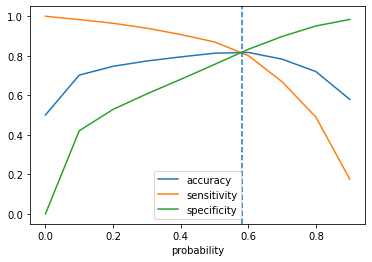

In [159]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.axvline(x=0.58, ls='--')
plt.show()

> **Analysis of the above plot** <br><br>
Accuracy - Becomes stable around 0.58<br><br>
Sensitivity - It decreases with increased probability.<br><br>
Specificity - It slightly increases with increased probability.<br><br>
At point 0.58 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

>**Our main goal is to acheive better sensitivity than accuracy and specificity. <br>
Now as per the above curve, we should take 0.58 as the optimum probability cutoff, we are taking *0.55* for acheiving higher sensitivity/recall.**



In [160]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

churn  churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.059013       0    1    0    0    0    0    0    0    0    0   
1      0    0.000189       1    1    0    0    0    0    0    0    0    0   
2      0    0.023005       2    1    0    0    0    0    0    0    0    0   
3      0    0.702515       3    1    1    1    1    1    1    1    1    0   
4      0    0.222563       4    1    1    1    0    0    0    0    0    0   

   0.9  predicted  
0    0          0  
1    0          0  
2    0          0  
3    0          1  
4    0          0

#### Metrics

In [161]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[15214  3874]
 [ 3053 16070]]


In [162]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [163]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8187171233414462
Sensitivity:- 0.8403493175756942
Specificity:- 0.7970452640402347


> It seems  good accuracy, sensitivity and specificity on the train set prediction.

#### Plotting the ROC Curve (Trade off between sensitivity & specificity)

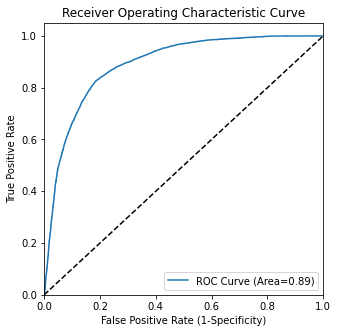

In [164]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

#### Testing the model on the Test set

In [165]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [166]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_colmns6]

In [167]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

#### Predictions on the test set with final model.


In [168]:
# Predict on the test set
y_test_pred = log_nopca_7.predict(X_test_sm)

In [169]:
y_test_pred.head()

87886    0.000720
11102    0.001272
73378    0.377782
92908    0.573239
9296     0.810561
dtype: float64

In [170]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
87886  0.000720
11102  0.001272
73378  0.377782
92908  0.573239
9296   0.810561

In [171]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Churn
87886      0
11102      0
73378      0
92908      0
9296       0

In [172]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [173]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [174]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [175]:
y_test_pred_final.head()


Churn  CustID         0
0      0   87886  0.000720
1      0   11102  0.001272
2      0   73378  0.377782
3      0   92908  0.573239
4      0    9296  0.810561

In [176]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [177]:
y_test_pred_final.head()

Churn  CustID  churn_prob
0      0   87886    0.000720
1      0   11102    0.001272
2      0   73378    0.377782
3      0   92908    0.573239
4      0    9296    0.810561

In [178]:
# In the test set using probablity cutoff 0.3, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.55 else 0)

In [179]:
y_test_pred_final.head()

Churn  CustID  churn_prob  test_predicted
0      0   87886    0.000720               0
1      0   11102    0.001272               0
2      0   73378    0.377782               0
3      0   92908    0.573239               1
4      0    9296    0.810561               1

In [180]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[3826  952]
 [  22  135]]


In [181]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [182]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8026342451874366
Sensitivity:- 0.8598726114649682
Specificity:- 0.8007534533277522


***Model Summary***<br><br>

**Train Dataset**<br><br>
Accuracy = 81.6%<br><br>
Sensitivity/Recall = 80.1%<br><br>
Specificity = 83.3%<br><br>

**Test Dataset**<br><br>
Accuracy = 80.3%<br><br>
Sensitivity/Recall = 85.9%<br><br>
Specificity = 80.1%<br><br>

### Conclusion of model with no PCA

Overall the model is performing well on the test set. It is evident that logistic model with no PCA has good sensitivity and accuracy. The model without PCA seems to be performing better in terms of sensitivity on the test set. So this model helps us to identify the variables which play a significant role in determining churning customers.

## Business Recommendations

### Top Predictors

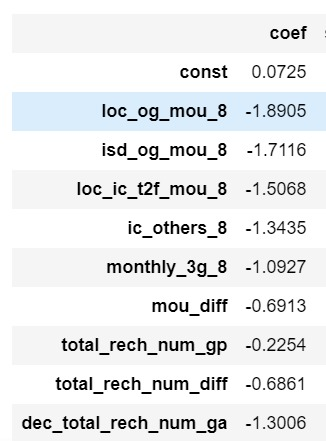

Above are the top features selected by logistic regression model. The negative coefficients implies that the variables are inversely correlated with the churn probablility.<br><br>
**Recommendations**<br><br>
1.Target the customers whose minutes of usage for local outgoing calls and outgoing ISD calls in the action phase (Month of August) are less.<br><br>
2.Target the customers whose minutes of usage for local incoming calls from the operator to the fixed lines of the same operator are less in the action phase (Month of August).<br><br>
3.Target customers whose incoming calls from other operators is less in the action phase.<br><br>
4.Customers whose monthly 3G recharge in August is less are most likely to be churned.<br><br>
5.Target customers whose difference in minutes of usage and number of recharges between the action phase and the good phase is less.<br><br>

#### Plots of important predictors for churn and non-churn customers

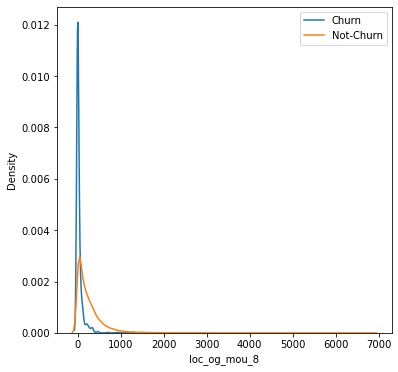

In [183]:
plt.figure(figsize=(6,6))
sns.distplot(df[df["Churn"] == 1]['loc_og_mou_8'], label="Churn", hist=False)
sns.distplot(df[df["Churn"] == 0]['loc_og_mou_8'], label="Not-Churn", hist=False)
plt.legend(loc='upper right')
plt.show()

>We can see that for the churn customers, the minutes of usage of local outgoing calls for the month of August is mostly populated on the lower value side than the non churn customers.

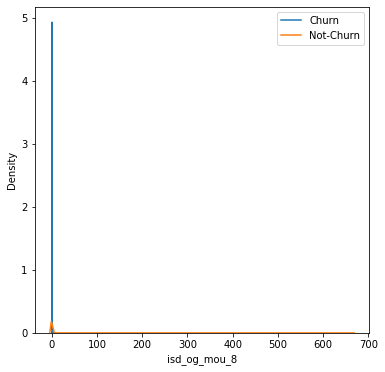

In [184]:
plt.figure(figsize=(6,6))
sns.distplot(df[df["Churn"] == 1]['isd_og_mou_8'], label="Churn", hist=False)
sns.distplot(df[df["Churn"] == 0]['isd_og_mou_8'], label="Not-Churn", hist=False)
plt.legend(loc='upper right')
plt.show()

>We can see that the ISD outgoing minutes of usage for the month of August for churn customers is thinned out to zero whereas for the non churn customers it is highly spread than the churn customers.

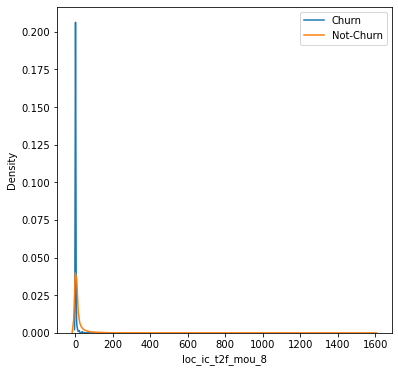

In [185]:
plt.figure(figsize=(6,6))
sns.distplot(df[df["Churn"] == 1]['loc_ic_t2f_mou_8'], label="Churn", hist=False)
sns.distplot(df[df["Churn"] == 0]['loc_ic_t2f_mou_8'], label="Not-Churn", hist=False)
plt.legend(loc='upper right')
plt.show()

> We can see that the minutes of usage for local incoming calls from a fixed line of the same operator is tending to zero for the churn customers whereas it showing a spread to higher values for non-churn customers.